In [1]:
# !sudo apt-get update
!sudo apt-get install python3-rtree
!sudo pip3 install geopandas descartes shapely ngram # matplotlib==3.1.3

Reading package lists... Done
Building dependency tree       
Reading state information... Done
python3-rtree is already the newest version (0.8.3+ds-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from datetime import datetime

t_start = datetime.now()

t_start

datetime.datetime(2022, 6, 8, 22, 55, 13, 31445)

In [3]:
# Render our plots inline
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [4]:
!curl 'https://data.cityofnewyork.us/api/views/h9gi-nx95/rows.csv?accessType=DOWNLOAD' -o accidents.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  387M    0  387M    0     0  4394k      0 --:--:--  0:01:30 --:--:-- 4921k


In [5]:
import pandas as pd
import geopandas as gpd

df = pd.read_csv("accidents.csv", low_memory=False, dtype='object')


In [6]:
df.dtypes

CRASH DATE                       object
CRASH TIME                       object
BOROUGH                          object
ZIP CODE                         object
LATITUDE                         object
LONGITUDE                        object
LOCATION                         object
ON STREET NAME                   object
CROSS STREET NAME                object
OFF STREET NAME                  object
NUMBER OF PERSONS INJURED        object
NUMBER OF PERSONS KILLED         object
NUMBER OF PEDESTRIANS INJURED    object
NUMBER OF PEDESTRIANS KILLED     object
NUMBER OF CYCLIST INJURED        object
NUMBER OF CYCLIST KILLED         object
NUMBER OF MOTORIST INJURED       object
NUMBER OF MOTORIST KILLED        object
CONTRIBUTING FACTOR VEHICLE 1    object
CONTRIBUTING FACTOR VEHICLE 2    object
CONTRIBUTING FACTOR VEHICLE 3    object
CONTRIBUTING FACTOR VEHICLE 4    object
CONTRIBUTING FACTOR VEHICLE 5    object
COLLISION_ID                     object
VEHICLE TYPE CODE 1              object


In [7]:
df.rename(
    {
    "COLLISION_ID": "UNIQUE_KEY",
    "ZIP CODE" : 'ZIPCODE',
    "NUMBER OF PERSONS INJURED": "PERSONS_INJURED",
    "NUMBER OF PERSONS KILLED": "PERSONS_KILLED",
    "NUMBER OF PEDESTRIANS INJURED": "PEDESTRIANS_INJURED",
    "NUMBER OF PEDESTRIANS KILLED": "PEDESTRIANS_KILLED",
    'NUMBER OF MOTORIST INJURED': 'MOTORISTS_INJURED',
    'NUMBER OF MOTORIST KILLED': 'MOTORISTS_KILLED', 
    'NUMBER OF CYCLIST INJURED': 'CYCLISTS_INJURED', 
    'NUMBER OF CYCLIST KILLED': 'CYCLISTS_KILLED',
    'CONTRIBUTING FACTOR VEHICLE 1': 'CAUSE_VEHICLE_1',
    'CONTRIBUTING FACTOR VEHICLE 2': 'CAUSE_VEHICLE_2',
    'CONTRIBUTING FACTOR VEHICLE 3': 'CAUSE_VEHICLE_3',
    'CONTRIBUTING FACTOR VEHICLE 4': 'CAUSE_VEHICLE_4',
    'CONTRIBUTING FACTOR VEHICLE 5': 'CAUSE_VEHICLE_5',
    'VEHICLE TYPE CODE 1': 'TYPE_VEHICLE_1',
    'VEHICLE TYPE CODE 2': 'TYPE_VEHICLE_2',
    'VEHICLE TYPE CODE 3': 'TYPE_VEHICLE_3',
    'VEHICLE TYPE CODE 4': 'TYPE_VEHICLE_4',
    'VEHICLE TYPE CODE 5': 'TYPE_VEHICLE_5',
    },
    axis = 'columns',
    inplace = True
)

In [8]:
cols = df.columns
cols = cols.map(lambda x: x.replace(' ', '_'))
df.columns = cols

In [9]:
df['DATE_TIME'] = df['CRASH_DATE'] + ' ' + df['CRASH_TIME']
df['DATE_TIME'] = pd.to_datetime(df['DATE_TIME'], format="%m/%d/%Y %H:%M")

In [10]:
df.dtypes

CRASH_DATE                     object
CRASH_TIME                     object
BOROUGH                        object
ZIPCODE                        object
LATITUDE                       object
LONGITUDE                      object
LOCATION                       object
ON_STREET_NAME                 object
CROSS_STREET_NAME              object
OFF_STREET_NAME                object
PERSONS_INJURED                object
PERSONS_KILLED                 object
PEDESTRIANS_INJURED            object
PEDESTRIANS_KILLED             object
CYCLISTS_INJURED               object
CYCLISTS_KILLED                object
MOTORISTS_INJURED              object
MOTORISTS_KILLED               object
CAUSE_VEHICLE_1                object
CAUSE_VEHICLE_2                object
CAUSE_VEHICLE_3                object
CAUSE_VEHICLE_4                object
CAUSE_VEHICLE_5                object
UNIQUE_KEY                     object
TYPE_VEHICLE_1                 object
TYPE_VEHICLE_2                 object
TYPE_VEHICLE

In [11]:
!rm accidents.csv

In [12]:
cols = [
    'UNIQUE_KEY',
    'DATE_TIME',
    'BOROUGH',
    'ZIPCODE',
    'LATITUDE',
    'LONGITUDE',
    'LOCATION',
    'ON_STREET_NAME',
    'CROSS_STREET_NAME',
    'OFF_STREET_NAME',
    'PERSONS_INJURED',
    'PERSONS_KILLED',
    'PEDESTRIANS_INJURED',
    'PEDESTRIANS_KILLED',
    'CYCLISTS_INJURED',
    'CYCLISTS_KILLED',
    'MOTORISTS_INJURED',
    'MOTORISTS_KILLED',
    'CAUSE_VEHICLE_1',
    'CAUSE_VEHICLE_2',
    'CAUSE_VEHICLE_3',
    'CAUSE_VEHICLE_4',
    'CAUSE_VEHICLE_5',
    'TYPE_VEHICLE_1',
    'TYPE_VEHICLE_2',
    'TYPE_VEHICLE_3',
    'TYPE_VEHICLE_4',
    'TYPE_VEHICLE_5',
]

df = df[cols].copy()

In [13]:
df.dtypes

UNIQUE_KEY                     object
DATE_TIME              datetime64[ns]
BOROUGH                        object
ZIPCODE                        object
LATITUDE                       object
LONGITUDE                      object
LOCATION                       object
ON_STREET_NAME                 object
CROSS_STREET_NAME              object
OFF_STREET_NAME                object
PERSONS_INJURED                object
PERSONS_KILLED                 object
PEDESTRIANS_INJURED            object
PEDESTRIANS_KILLED             object
CYCLISTS_INJURED               object
CYCLISTS_KILLED                object
MOTORISTS_INJURED              object
MOTORISTS_KILLED               object
CAUSE_VEHICLE_1                object
CAUSE_VEHICLE_2                object
CAUSE_VEHICLE_3                object
CAUSE_VEHICLE_4                object
CAUSE_VEHICLE_5                object
TYPE_VEHICLE_1                 object
TYPE_VEHICLE_2                 object
TYPE_VEHICLE_3                 object
TYPE_VEHICLE

## Analysis of Data Types

In [14]:
df.UNIQUE_KEY = df.UNIQUE_KEY.str.zfill(7)

### Datetime

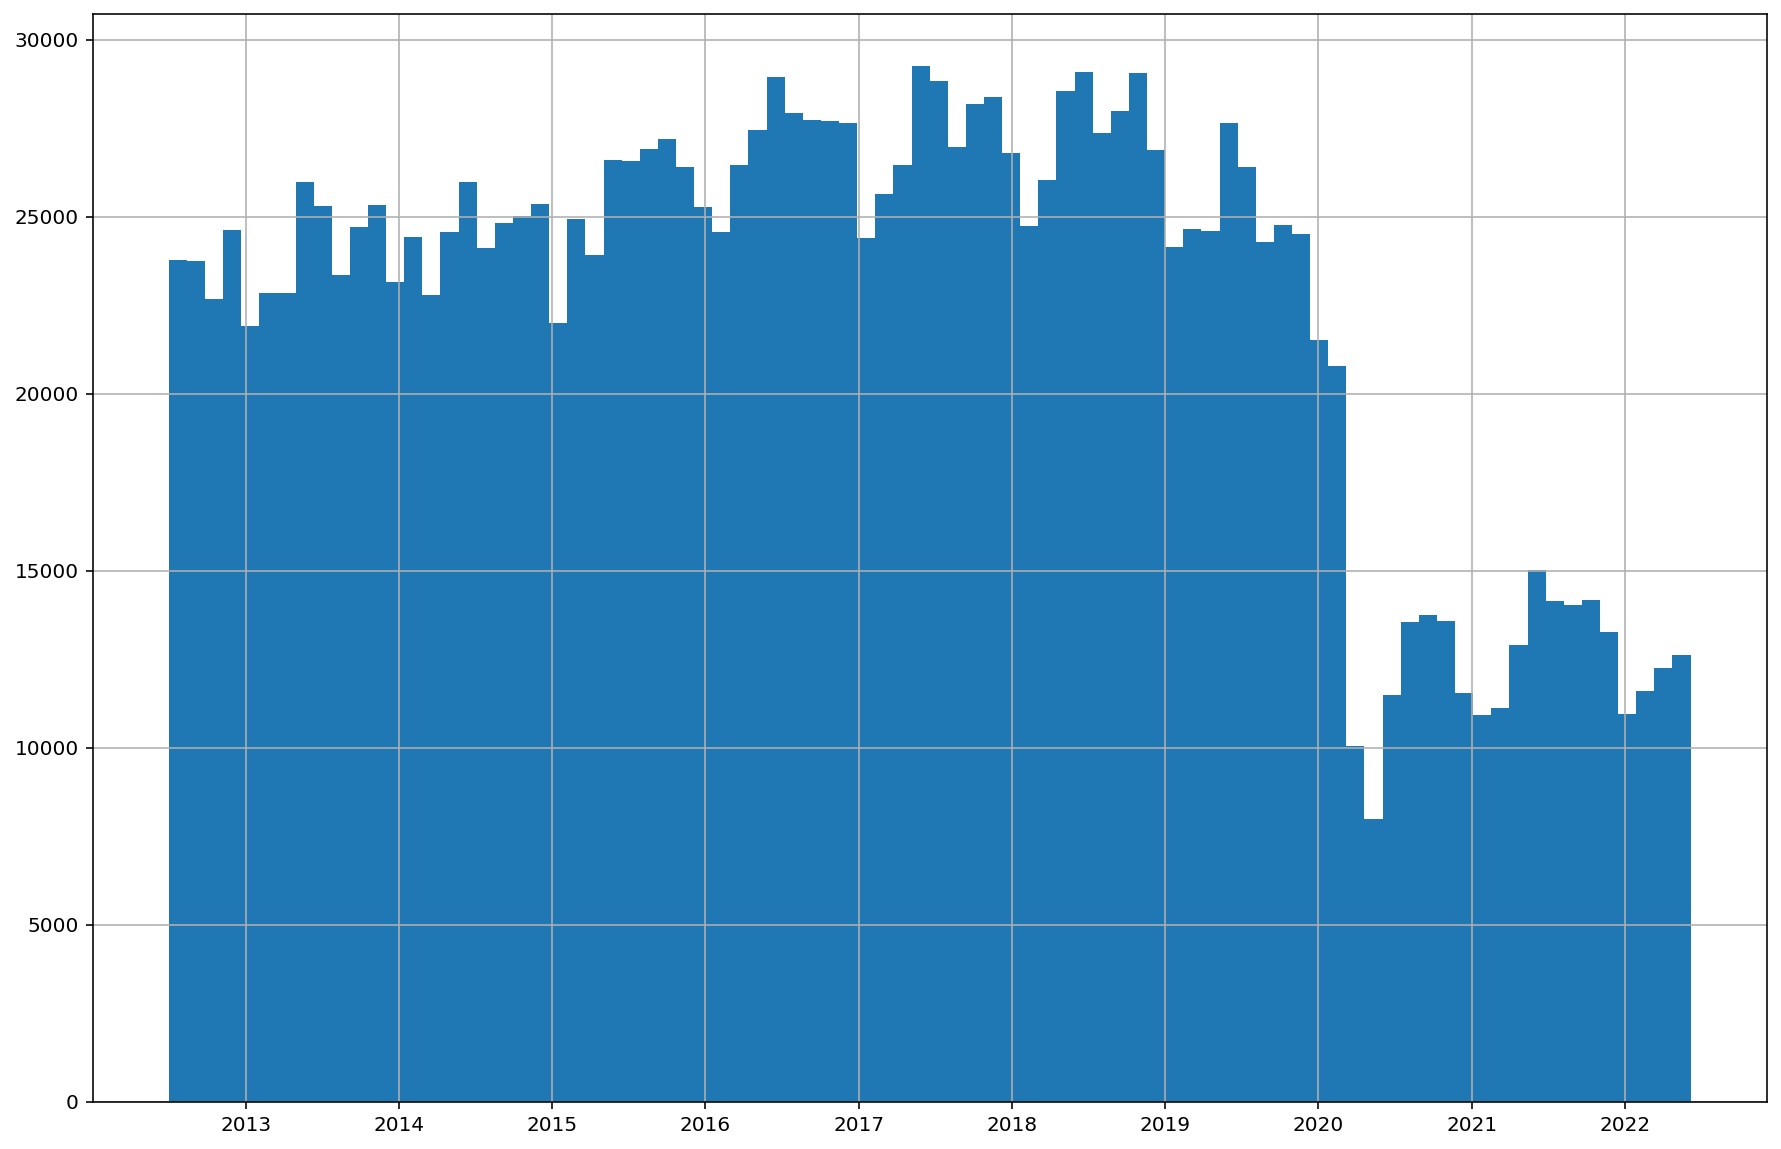

In [15]:
df['DATE_TIME'].hist(bins=7*12, figsize=(15,10))

In [16]:
# df.drop( ['DATE','TIME'], axis='columns', inplace=True)

### Borough

In [17]:
df['BOROUGH'] = pd.Categorical(df.BOROUGH)

In [18]:
df['BOROUGH'].value_counts()

BROOKLYN         413452
QUEENS           351014
MANHATTAN        299085
BRONX            191660
STATEN ISLAND     55064
Name: BOROUGH, dtype: int64

In [19]:
sum(~df['BOROUGH'].isnull())

1310275

In [20]:
# Significant number of missing values
# We will fix later, by joining with the NYC neighborhood shapefile
sum(df['BOROUGH'].isnull())

588131

### Zip Code

In [21]:
df['ZIPCODE'] = pd.Categorical(df['ZIPCODE'])

In [22]:
# Significant number of missing values
# We will fix later, by joining with the NYC ZIP shapefile
sum(df['ZIPCODE'].isnull())

588358

In [23]:
# We will get back to these columns with geo-shapefiles

### Longitute and Latitude

In [24]:
df.LATITUDE = pd.to_numeric(df.LATITUDE)
df.LONGITUDE  = pd.to_numeric(df.LONGITUDE)

In [25]:
sum(df['LATITUDE'].isnull() | df['LONGITUDE'].isnull())

220207

In [26]:
df['LATITUDE'].fillna(0.0, inplace=True)
df['LONGITUDE'].fillna(0.0, inplace=True)

# We keep LOCATION (which is largely redundant), just to make easy
# analysis of errors later on. 
df.LOCATION = '(' + df.LATITUDE.astype(float).astype(str) + ', ' + df.LONGITUDE.astype(float).astype(str) + ')'

# This is just lon/lat combined, we could drop it, but we will drop it later
# df.drop( ['LOCATION'], axis='columns', inplace=True)

### Numeric Fields

In [27]:
# df['UNIQUE_KEY'] = pd.to_numeric(df['UNIQUE_KEY'], downcast='unsigned')

In [28]:
df['PERSONS_INJURED'].fillna(0, inplace=True)
df['PERSONS_INJURED'] = pd.to_numeric(df['PERSONS_INJURED'], downcast='unsigned')

In [29]:
df['PERSONS_KILLED'].fillna(0, inplace=True)
df['PERSONS_KILLED']  = pd.to_numeric(df['PERSONS_KILLED'], downcast='unsigned')

In [30]:
df['PEDESTRIANS_INJURED'].fillna(0, inplace=True)
df['PEDESTRIANS_INJURED'] = pd.to_numeric(df['PEDESTRIANS_INJURED'], downcast='unsigned')

In [31]:
df['PEDESTRIANS_KILLED'].fillna(0, inplace=True)
df['PEDESTRIANS_KILLED'] = pd.to_numeric(df['PEDESTRIANS_KILLED'], downcast='unsigned')

In [32]:
df['CYCLISTS_INJURED'].fillna(0, inplace=True)
df['CYCLISTS_INJURED'] = pd.to_numeric(df['CYCLISTS_INJURED'], downcast='unsigned')

In [33]:
df['CYCLISTS_KILLED'].fillna(0, inplace=True)
df['CYCLISTS_KILLED'] = pd.to_numeric(df['CYCLISTS_KILLED'], downcast='unsigned')

In [34]:
df['MOTORISTS_INJURED'].fillna(0, inplace=True)
df['MOTORISTS_INJURED'] = pd.to_numeric(df['MOTORISTS_INJURED'], downcast='unsigned')

In [35]:
df['MOTORISTS_KILLED'].fillna(0, inplace=True)
df['MOTORISTS_KILLED'] = pd.to_numeric(df['MOTORISTS_KILLED'], downcast='unsigned')

## Normalizing Causes and Types

In [36]:
df['CAUSE_VEHICLE_1'] = pd.Categorical(df['CAUSE_VEHICLE_1'].str.upper())
df['CAUSE_VEHICLE_2'] = pd.Categorical(df['CAUSE_VEHICLE_2'].str.upper())
df['CAUSE_VEHICLE_3'] = pd.Categorical(df['CAUSE_VEHICLE_3'].str.upper())
df['CAUSE_VEHICLE_4'] = pd.Categorical(df['CAUSE_VEHICLE_4'].str.upper())
df['CAUSE_VEHICLE_5'] = pd.Categorical(df['CAUSE_VEHICLE_5'].str.upper())
df['TYPE_VEHICLE_1'] = pd.Categorical(df['TYPE_VEHICLE_1'].str.upper())
df['TYPE_VEHICLE_2'] = pd.Categorical(df['TYPE_VEHICLE_2'].str.upper())
df['TYPE_VEHICLE_3'] = pd.Categorical(df['TYPE_VEHICLE_3'].str.upper())
df['TYPE_VEHICLE_4'] = pd.Categorical(df['TYPE_VEHICLE_4'].str.upper())
df['TYPE_VEHICLE_5'] = pd.Categorical(df['TYPE_VEHICLE_5'].str.upper())


In [37]:
import numpy as np
df1 = df[['UNIQUE_KEY', 'CAUSE_VEHICLE_1', 'TYPE_VEHICLE_1']].copy()
df1['VEHICLE'] = 1
df1.columns = ['UNIQUE_KEY', 'CAUSE', 'VEHICLE_TYPE', 'VEHICLE']

df2 = df[['UNIQUE_KEY', 'CAUSE_VEHICLE_2', 'TYPE_VEHICLE_2']].copy()
df2['VEHICLE'] = 2
df2.columns = ['UNIQUE_KEY', 'CAUSE', 'VEHICLE_TYPE', 'VEHICLE']

df3 = df[['UNIQUE_KEY', 'CAUSE_VEHICLE_3', 'TYPE_VEHICLE_3']].copy()
df3['VEHICLE'] = 3
df3.columns = ['UNIQUE_KEY', 'CAUSE', 'VEHICLE_TYPE', 'VEHICLE']

df4 = df[['UNIQUE_KEY', 'CAUSE_VEHICLE_4', 'TYPE_VEHICLE_4']].copy()
df4['VEHICLE'] = 4
df4.columns = ['UNIQUE_KEY', 'CAUSE', 'VEHICLE_TYPE', 'VEHICLE']

df5 = df[['UNIQUE_KEY', 'CAUSE_VEHICLE_5', 'TYPE_VEHICLE_5']].copy()
df5['VEHICLE'] = 5
df5.columns = ['UNIQUE_KEY', 'CAUSE', 'VEHICLE_TYPE', 'VEHICLE']



In [38]:
concat_df = [df1, df2, df3, df4, df5]
ct_df = pd.concat(concat_df)
ct_df = ct_df.set_index('UNIQUE_KEY')
ct_df = ct_df.sort_values(['UNIQUE_KEY', 'VEHICLE'])
ct_df = ct_df.dropna()

In [39]:
# ct_df['CAUSE'] = pd.Categorical(ct_df['CAUSE'])
# ct_df['VEHICLE_TYPE'] = pd.Categorical(ct_df['VEHICLE_TYPE'])
# ct_df['VEHICLE'] = pd.Categorical(ct_df['VEHICLE'])

In [40]:
# Since we have the ct_df ("causes/types dataframe") we can drop these columns
# from the main dataframe
todrop = [
    'CAUSE_VEHICLE_1', 'TYPE_VEHICLE_1', 
    'CAUSE_VEHICLE_2', 'TYPE_VEHICLE_2',
    'CAUSE_VEHICLE_3', 'TYPE_VEHICLE_3', 
    'CAUSE_VEHICLE_4', 'TYPE_VEHICLE_4',
    'CAUSE_VEHICLE_5', 'TYPE_VEHICLE_5'
]
df.drop(todrop, axis='columns', inplace=True)

## Detecting Inconsistencies

In [41]:
# Incorrect number for injured people
check = (df.PEDESTRIANS_INJURED + df.CYCLISTS_INJURED + df.MOTORISTS_INJURED != df.PERSONS_INJURED)
incorrect_injured = set(df[check].UNIQUE_KEY.values)
len(incorrect_injured)

3484

In [42]:
# Incorrect number of people killed
check = ( df.PEDESTRIANS_KILLED + df.CYCLISTS_KILLED + df.MOTORISTS_KILLED != df.PERSONS_KILLED)
incorrect_killed = set(df[check].UNIQUE_KEY.values)
len(incorrect_killed)

31

In [43]:
# No entries for vehicle/cause
nocause = set(df.UNIQUE_KEY.values) -set(ct_df.index.values)
len(nocause)

13476

In [44]:
# Incorrect number of entries for vehicle types/causes 
dd1 = ct_df[['VEHICLE']].groupby('UNIQUE_KEY').count() # number of vehicles involved
dd2 = ct_df[['VEHICLE']].groupby('UNIQUE_KEY').max() # higher number of VEHICLE_NUM
j = dd1.merge(dd2, left_index=True, right_index=True)
j.columns = ['cnt', 'max']
# j.query("cnt != max")

incorrect_vehicles = set(j[j['max'] != j['cnt']].index.values)
len(incorrect_vehicles)

9

In [45]:
todelete = incorrect_injured | incorrect_killed | nocause | incorrect_vehicles

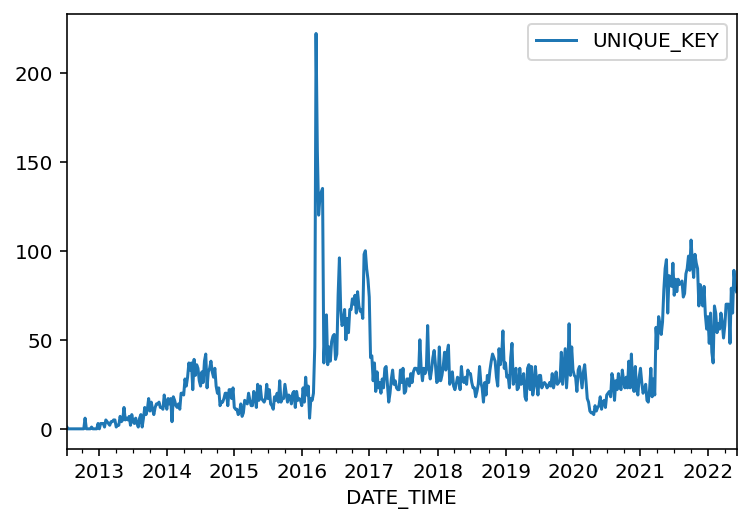

In [46]:
df[ df.UNIQUE_KEY.isin(todelete) ].pivot_table(
    index='DATE_TIME',
    values='UNIQUE_KEY',
    aggfunc='count'
).resample('1W').sum().plot()

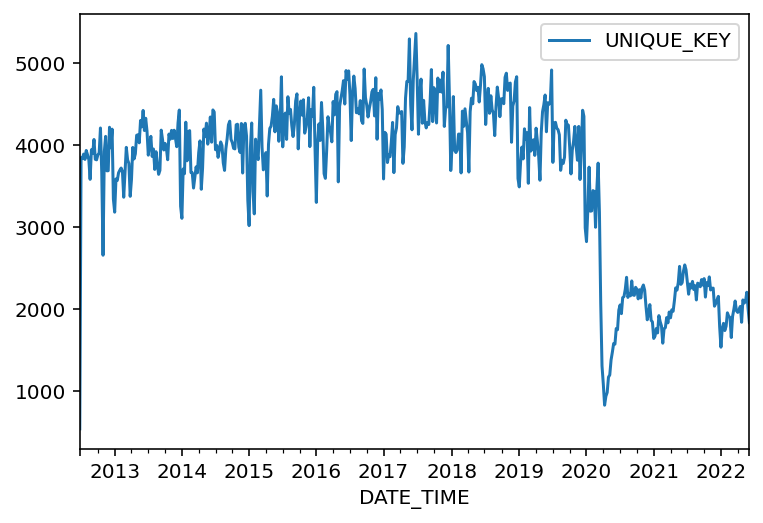

In [47]:
df.pivot_table(
    index='DATE_TIME',
    values='UNIQUE_KEY',
    aggfunc='count'
).resample('1W').sum().plot()

In [48]:
df = df[ ~df.UNIQUE_KEY.isin(todelete) ].copy()

## Lon/lat analysis, plus zipcode/borough

In [49]:
# The 'mask' sets rough bound box limits for NYC
mask = (df.LATITUDE > 40) & (df.LATITUDE < 41) & (df.LONGITUDE < -72) & (df.LONGITUDE > -74.5)


In [50]:
len(df[ ~mask ])

222084

In [51]:
len(df[ mask ])

1659705

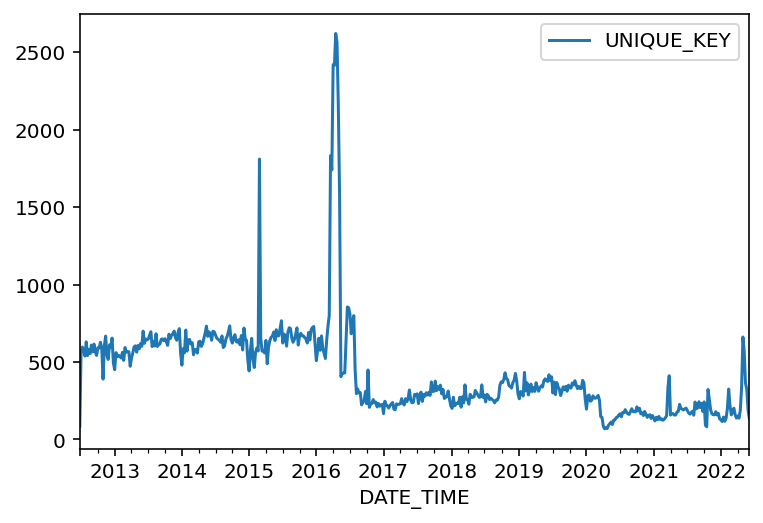

In [53]:
# Check if there is a temporal pattern in the errors
# where lon/lat are clearly not within NYC boundaries
# They are mostly missing ie. location = (0.0,0.0)
# The spikes are visible for the period of Mar-May 2016
# While we will drop these, it would be good to re-examine
# these later on
df[ ~mask ].pivot_table(
    index='DATE_TIME',
    values='UNIQUE_KEY',
    aggfunc='count'
).resample('1W').sum().plot()

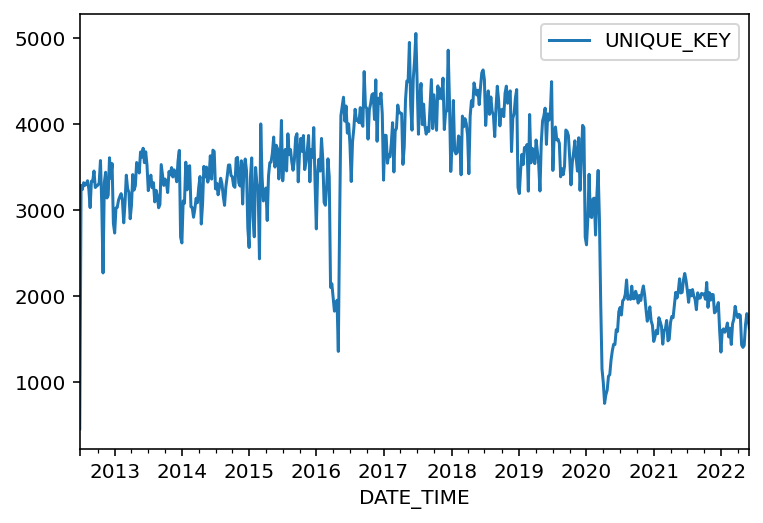

In [54]:
# We have a dillema here: If we drop the incorrect lon/lat values
# then we introduce clear abnormalities in the number of accidents over time
df[ mask ].pivot_table(
    index='DATE_TIME',
    values='UNIQUE_KEY',
    aggfunc='count'
).resample('1W').sum().plot()

In [55]:
# FIXABLE error
# We have lon/lat within the NYC boundaries, but no borough
len(df[ mask & df.BOROUGH.isnull()])

398296

In [56]:
# FIXABLE error
# We have lon/lat within the NYC boundaries, but no ZIP
len(df[ mask & df.ZIPCODE.isnull()])

398502

In [57]:
# No cases where BOROUGH is null but zipcode is not
df[ df.BOROUGH.isnull() & ~df.ZIPCODE.isnull()]

Empty DataFrame
Columns: [UNIQUE_KEY, DATE_TIME, BOROUGH, ZIPCODE, LATITUDE, LONGITUDE, LOCATION, ON_STREET_NAME, CROSS_STREET_NAME, OFF_STREET_NAME, PERSONS_INJURED, PERSONS_KILLED, PEDESTRIANS_INJURED, PEDESTRIANS_KILLED, CYCLISTS_INJURED, CYCLISTS_KILLED, MOTORISTS_INJURED, MOTORISTS_KILLED]
Index: []

In [58]:
# Small number of cases where the borough is missing but not zip
len(df[ ~df.BOROUGH.isnull() & df.ZIPCODE.isnull() ])

226

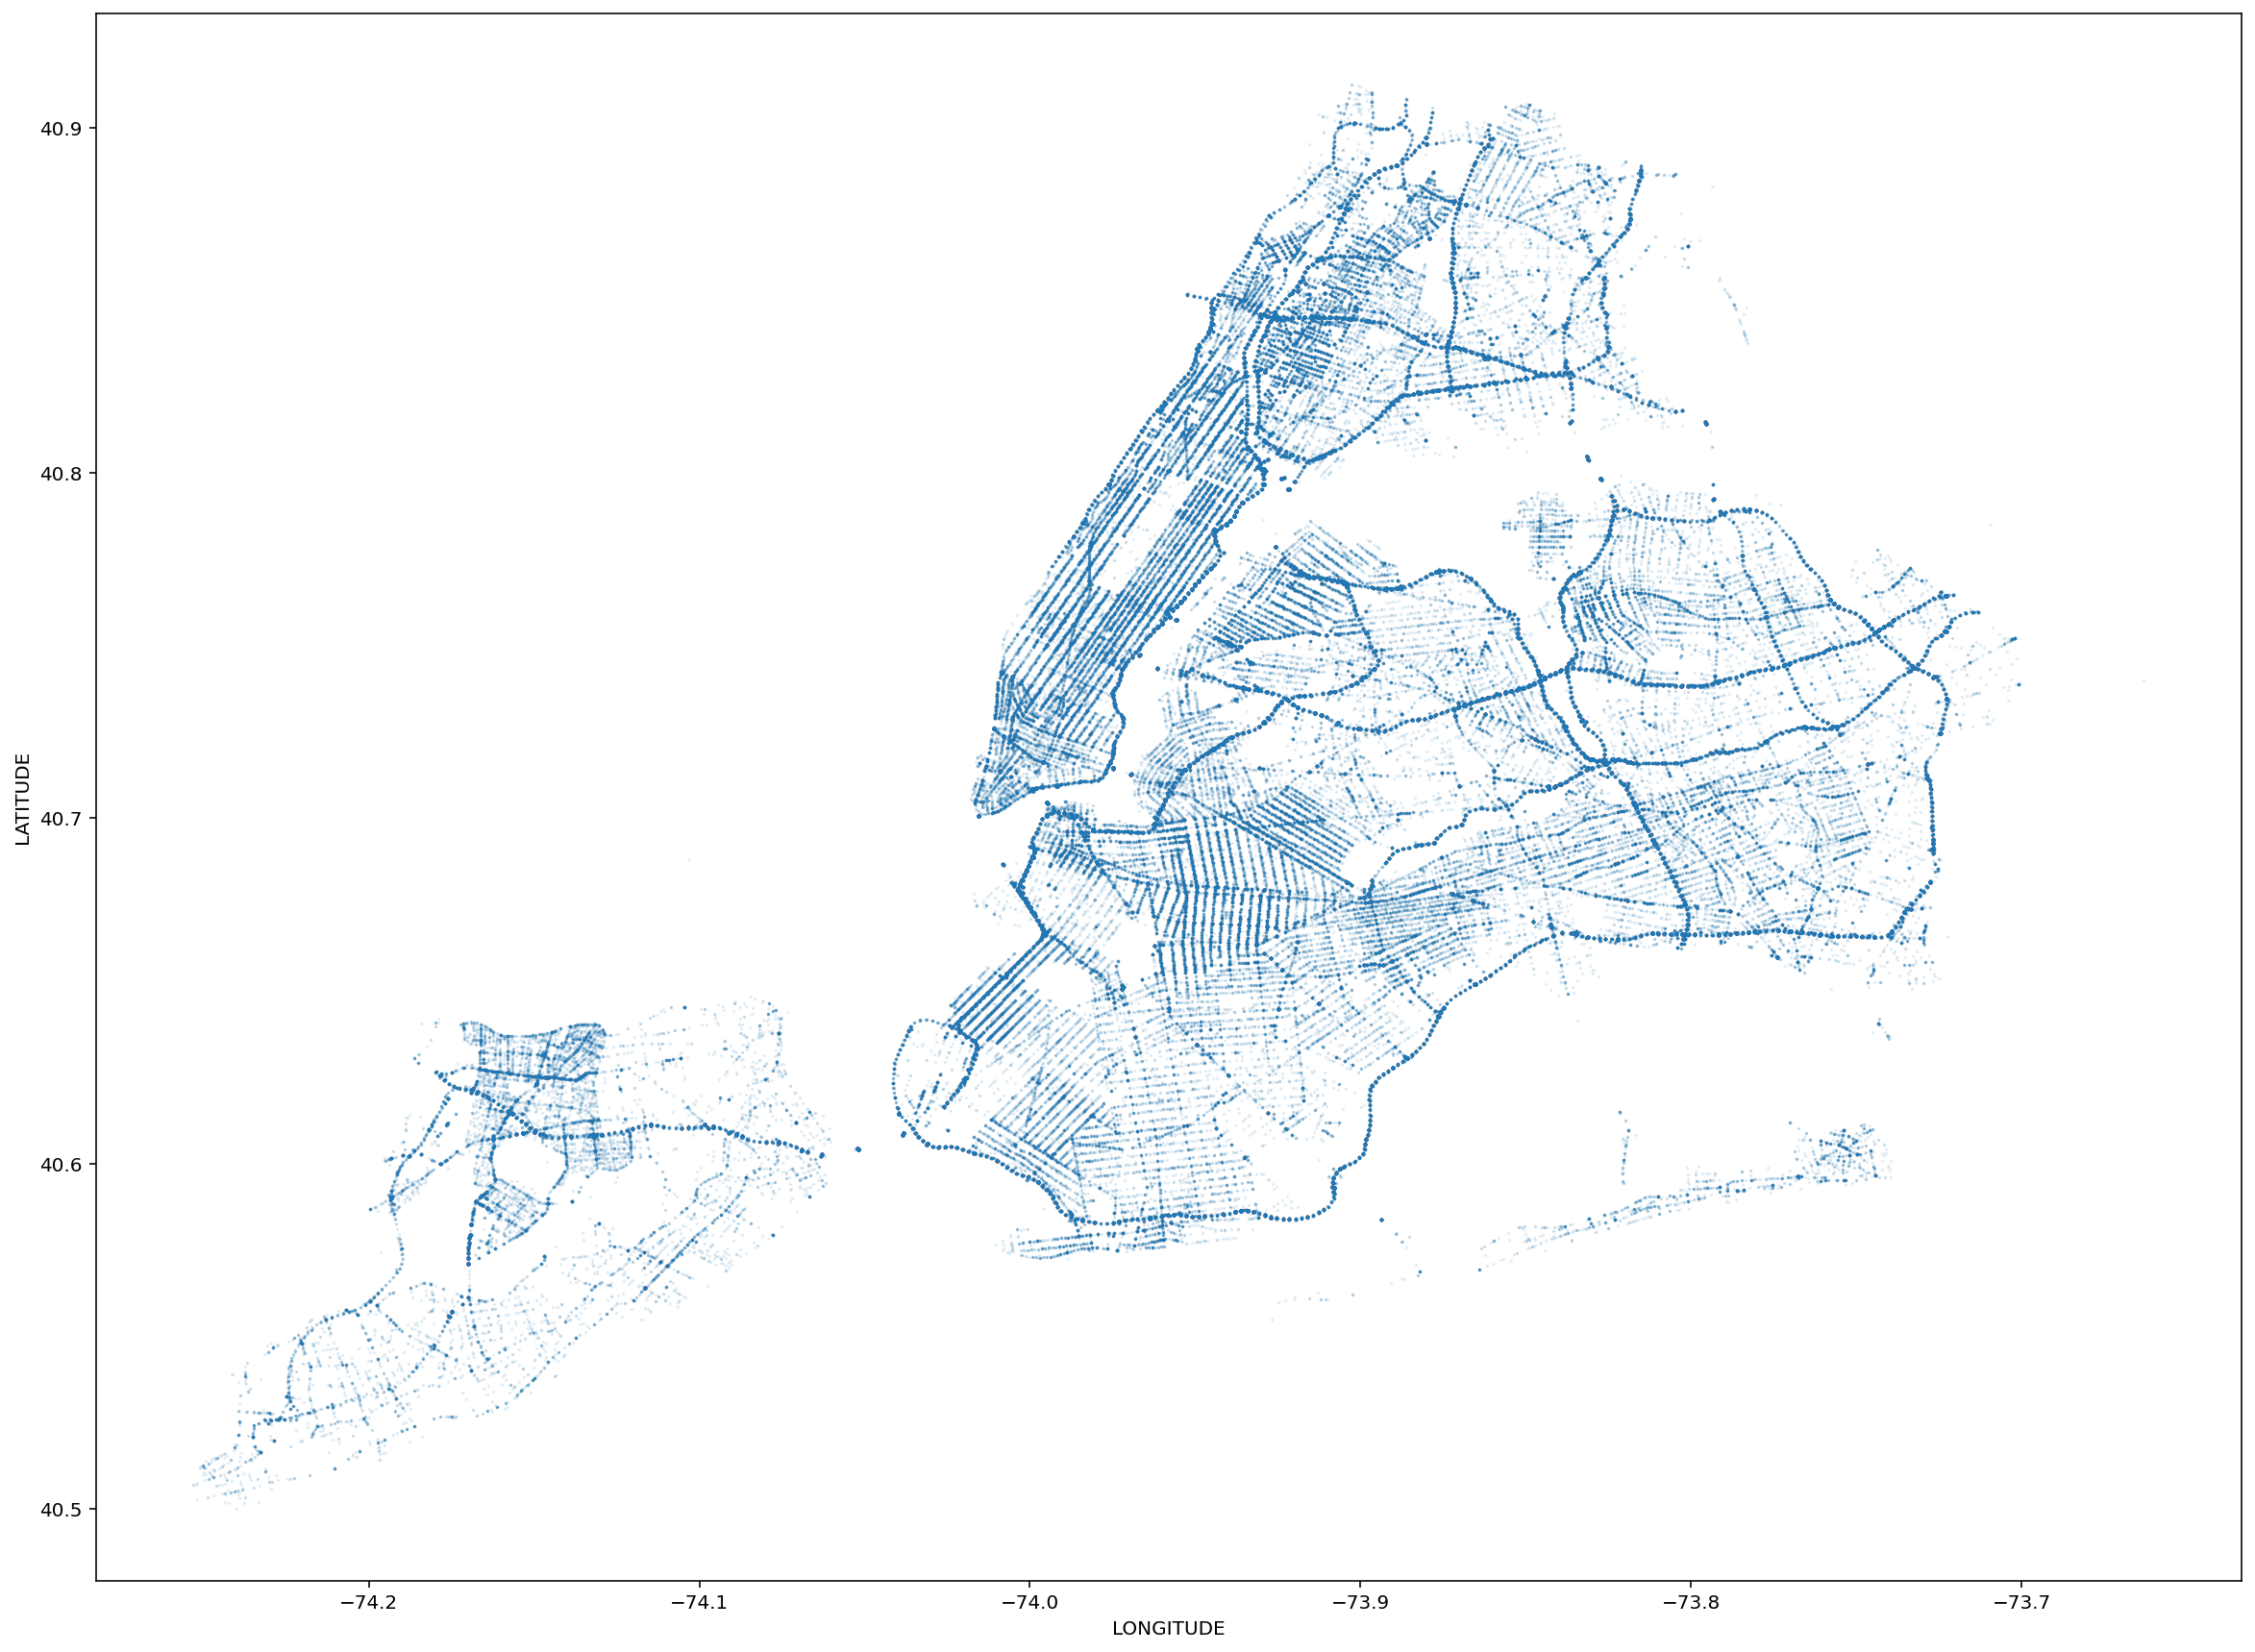

In [59]:
# A map of all the accidents where the BOROUGH is NULL
# We do not detect any obvious spatial patterns of missingness
# at least visually


df[ df.BOROUGH.isnull() & mask ].plot(
    kind='scatter',
    x='LONGITUDE',
    y='LATITUDE',
    figsize=(20, 15),
    s=0.5,
    alpha=0.1)

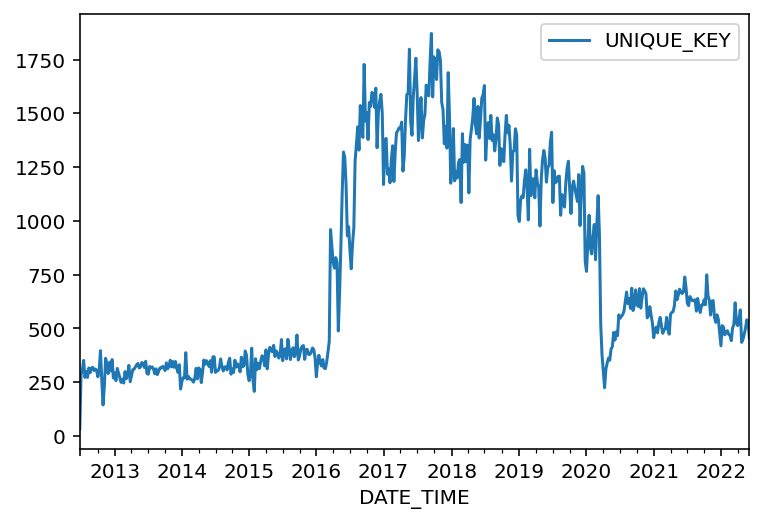

In [60]:
# Check if there is a temporal pattern in the errors

df[ df.BOROUGH.isnull() & mask ].pivot_table(
    index='DATE_TIME',
    values='UNIQUE_KEY',
    aggfunc='count'
).resample('1W').sum().plot()

## Augment Borough and Zipcode using Shapefiles

In [61]:
%%time
# We start by converting the LON/LAT attributes into Shapely "geo-points"
# and convert the resut into a geodataframe so that we can do a spatial join 
#from shapely.geometry import Point
#df['Coordinates'] = list(zip(df.LONGITUDE, df.LATITUDE))
#df['Coordinates'] = df['Coordinates'].apply(Point)
#gdf = gpd.GeoDataFrame(df, geometry='Coordinates')

gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.LONGITUDE, df.LATITUDE))

CPU times: user 1min 7s, sys: 1.59 s, total: 1min 9s
Wall time: 1min 9s


In [62]:
len(df)

1881789

In [63]:
# We will now perform a spatial join with the NYC shapefile 
# to find the neighborhood for each accident, and also filter out
# automatically all the accidents that have incorrect coordinates
# and/or incorrect BOROUGH listed

In [64]:
shapefile_url = 'https://data.cityofnewyork.us/api/geospatial/cpf4-rkhq?method=export&format=Shapefile'
df_nyc = gpd.GeoDataFrame.from_file(shapefile_url)

In [65]:
df_nyc.crs

<Geographic 2D CRS: GEOGCS["WGS84(DD)",DATUM["WGS84",SPHEROID["WGS84", ...>
Name: WGS84(DD)
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- undefined
Datum: WGS84
- Ellipsoid: WGS84
- Prime Meridian: Greenwich

In [66]:
%%time
# Match each accident with a neighborhood. 
# Takes ~ 6-7 mins to run
# This is done with left join, 
# so we preserve all the data points
# but we know which ones are not matching with the shapefile
gdf.crs = df_nyc.crs
gdf = gpd.sjoin(gdf, df_nyc, how='left')


CPU times: user 3min 20s, sys: 716 ms, total: 3min 21s
Wall time: 3min 22s


In [67]:
len(gdf)

1881789

In [68]:
gdf.columns

Index(['UNIQUE_KEY', 'DATE_TIME', 'BOROUGH', 'ZIPCODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON_STREET_NAME', 'CROSS_STREET_NAME',
       'OFF_STREET_NAME', 'PERSONS_INJURED', 'PERSONS_KILLED',
       'PEDESTRIANS_INJURED', 'PEDESTRIANS_KILLED', 'CYCLISTS_INJURED',
       'CYCLISTS_KILLED', 'MOTORISTS_INJURED', 'MOTORISTS_KILLED', 'geometry',
       'index_right', 'boro_code', 'boro_name', 'county_fip', 'ntacode',
       'ntaname', 'shape_area', 'shape_leng'],
      dtype='object')

In [69]:
# We keep only boro_name and ntaname
todrop = [
    'index_right', 'boro_code', 'county_fip', 'ntacode',
    'shape_area', 'shape_leng'
]

gdf = gdf.drop(todrop, axis='columns')

# Rename the columns
gdf = gdf.rename({
    'boro_name': 'GEO_BOROUGH',
    'ntaname': 'GEO_NEIGHBORHOOD',
},
                 axis='columns')

In [70]:
gdf.columns.values

array(['UNIQUE_KEY', 'DATE_TIME', 'BOROUGH', 'ZIPCODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON_STREET_NAME', 'CROSS_STREET_NAME',
       'OFF_STREET_NAME', 'PERSONS_INJURED', 'PERSONS_KILLED',
       'PEDESTRIANS_INJURED', 'PEDESTRIANS_KILLED', 'CYCLISTS_INJURED',
       'CYCLISTS_KILLED', 'MOTORISTS_INJURED', 'MOTORISTS_KILLED',
       'geometry', 'GEO_BOROUGH', 'GEO_NEIGHBORHOOD'], dtype=object)

In [71]:
%%time
shapefile_zip = 'https://data.cityofnewyork.us/download/i8iw-xf4u/application%2Fzip'
df_zip = gpd.GeoDataFrame.from_file(shapefile_zip)
# Converting the df_zip from {'init': 'epsg:2263'} coordinate system
# to the same lon/lat system used by df_nyc
df_zip = df_zip.to_crs(df_nyc.crs)

# Creating the geodataframe using lon/lat coordinates
# gdf['Coordinates'] = list(zip(gdf.LONGITUDE, gdf.LATITUDE))
# gdf['Coordinates'] = gdf['Coordinates'].apply(Point)
# gdf = gpd.GeoDataFrame(gdf, geometry='Coordinates')

# Spatial inner join, keeping 
gdf.crs = df_zip.crs
gdf = gpd.sjoin(gdf, df_zip, how='left')

todrop = [
    'BLDGZIP', 'PO_NAME', 'POPULATION', 'AREA', 'STATE', 'COUNTY', 'ST_FIPS',
    'CTY_FIPS', 'URL', 'SHAPE_AREA', 'SHAPE_LEN', 'index_right'
]
gdf = gdf.drop(todrop, axis='columns')
gdf = gdf.rename({'ZIPCODE_left': 'ZIPCODE', 'ZIPCODE_right': 'GEO_ZIPCODE'}, axis='columns')

CPU times: user 3min 20s, sys: 2.15 s, total: 3min 22s
Wall time: 3min 23s


In [72]:
gdf.columns.values

array(['UNIQUE_KEY', 'DATE_TIME', 'BOROUGH', 'ZIPCODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON_STREET_NAME', 'CROSS_STREET_NAME',
       'OFF_STREET_NAME', 'PERSONS_INJURED', 'PERSONS_KILLED',
       'PEDESTRIANS_INJURED', 'PEDESTRIANS_KILLED', 'CYCLISTS_INJURED',
       'CYCLISTS_KILLED', 'MOTORISTS_INJURED', 'MOTORISTS_KILLED',
       'geometry', 'GEO_BOROUGH', 'GEO_NEIGHBORHOOD', 'GEO_ZIPCODE'],
      dtype=object)

In [73]:
len(gdf)

1882761

## Post-Augmentation Analysis of Inconsistencies

In [74]:
len(gdf)

1882761

In [75]:
# Ensure that all collisions are in place
not_matching = set(df['UNIQUE_KEY'].values) - set(gdf['UNIQUE_KEY'].values)
assert( len(not_matching) ==0 )

In [76]:
# Did not match with a shape within the NYC Neighborhoods
len(gdf[ gdf.GEO_BOROUGH.isnull() ])

230216

In [77]:
# Did not match with a shape within the NYC ZIP codes
len(gdf[ gdf.GEO_ZIPCODE.isnull() ])

231045

In [78]:
# Did not match with neither zip nor neighborhood
len(gdf[ gdf.GEO_ZIPCODE.isnull() & gdf.GEO_BOROUGH.isnull() ])

229578

In [79]:
len(gdf[ gdf.GEO_ZIPCODE.isnull() & ~gdf.GEO_BOROUGH.isnull() ])

1467

In [80]:
len(gdf[ ~gdf.GEO_ZIPCODE.isnull() & gdf.GEO_BOROUGH.isnull() ])

638

### Outside general NYC area

These are mainly the entries with no lon/lat, or very incorrect lon/lat

In [81]:
# Defines  LON/LAT entries that are plausibly within NYC
mask = (gdf.LATITUDE > 40) & (gdf.LATITUDE < 41) & (gdf.LONGITUDE < -72) & (gdf.LONGITUDE > -74.5)


In [82]:
# These are the entries that we could filter out with a simple mask
nm1 = gdf[ gdf.GEO_BOROUGH.isnull() & ~mask ]
nm1.head()

UNIQUE_KEY           DATE_TIME   BOROUGH ZIPCODE  LATITUDE  LONGITUDE  \
0    4407480 2021-04-14 05:32:00       NaN     NaN       0.0        0.0   
2    4407665 2021-04-15 16:15:00       NaN     NaN       0.0        0.0   
3    4407811 2021-04-13 16:00:00  BROOKLYN   11222       0.0        0.0   
4    4406885 2021-04-12 08:25:00       NaN     NaN       0.0        0.0   
5    4407883 2021-04-13 17:11:00       NaN     NaN       0.0        0.0   

     LOCATION                    ON_STREET_NAME CROSS_STREET_NAME  \
0  (0.0, 0.0)           BRONX WHITESTONE BRIDGE               NaN   
2  (0.0, 0.0)          HUTCHINSON RIVER PARKWAY               NaN   
3  (0.0, 0.0)                 VANDERVORT AVENUE    ANTHONY STREET   
4  (0.0, 0.0)  EDSON AVENUE                                   NaN   
5  (0.0, 0.0)            VERRAZANO BRIDGE UPPER               NaN   

  OFF_STREET_NAME  ...  PEDESTRIANS_INJURED  PEDESTRIANS_KILLED  \
0             NaN  ...                    0                   0   
2             NaN  ...                    0                   0   
3             NaN  ...                    0                   0   
4             NaN  ...                    0                   0   
5             NaN  ...                    0                   0   

   CYCLISTS_INJURED  CYCLISTS_KILLED  MOTORISTS_INJURED  MOTORISTS_KILLED  \
0                 0                0                  0                 0   
2                 0                0                  0                 0   
3                 0                0                  0                 0   
4                 0                0                  0                 0   
5                 0                0                  0                 0   

                  geometry  GEO_BOROUGH GEO_NEIGHBORHOOD GEO_ZIPCODE  
0  POINT (0.00000 0.00000)          NaN              NaN         NaN  
2  POINT (0.00000 0.00000)          NaN              NaN         NaN  
3  POINT (0.00000 0.00000)          NaN              NaN         NaN  
4  POINT (0.00000 0.00000)          NaN              NaN         NaN  
5  POINT (0.00000 0.00000)          NaN              NaN         NaN  

[5 rows x 22 columns]

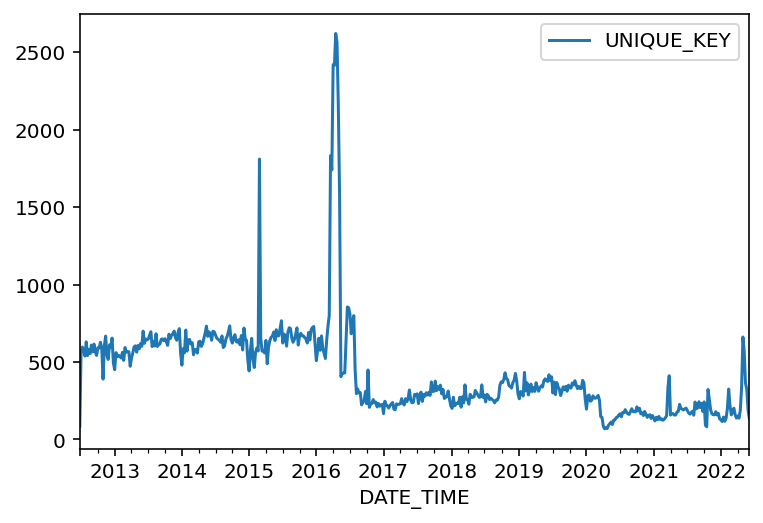

In [85]:
nm1.pivot_table(
    index='DATE_TIME',
    values='UNIQUE_KEY',
    aggfunc='count'
).resample('1W').sum().plot()

In [86]:
nm1.LOCATION.value_counts()

(0.0, 0.0)                 221935
(40.75837, -201.23706)        105
(40.665226, -32.768513)        16
(40.5606, -74.742)              7
(41.12615, -73.71353)           5
(40.556175, -47.209625)         3
(41.061634, -73.97066)          2
(30.78418, -89.13527)           1
(41.34796, -73.96965)           1
(41.258785, -73.99024)          1
(34.783634, -86.76847)          1
(42.107204, -76.02163)          1
(42.64154, -79.00183)           1
(43.344444, -76.2634)           1
(42.318317, -73.755936)         1
(40.854286, -201.35999)         1
(41.12421, -73.71412)           1
(41.91661, -79.61955)           1
Name: LOCATION, dtype: int64

### No borough detected, within NYC boundaries

In [87]:
# These are the entries that are not matching with a neighborhood
# but are within the NYC boundaries.
nm2 = gdf[gdf.GEO_BOROUGH.isnull() & mask  ]
len(nm2)

8132

In [88]:
nm2.LOCATION.value_counts().head(10)

(40.608757, -74.038086)     669
(40.798256, -73.82744)      461
(40.604153, -74.05198)      440
(40.704422, -73.99491)      381
(40.604313, -74.05208)      160
(40.75834, -73.95775)       141
(40.714527, -73.97481)      138
(40.727873, -73.9291223)    138
(40.608364, -74.038666)     131
(40.845352, -73.92821)      128
Name: LOCATION, dtype: int64

In [89]:
nm2['ON_STREET_NAME'].value_counts().head(10)

VERRAZANO BRIDGE UPPER              858
BRONX WHITESTONE BRIDGE             773
BROOKLYN BRIDGE                     603
VERRAZANO BRIDGE LOWER              355
THROGS NECK BRIDGE                  344
WILLIAMSBURG BRIDGE OUTER ROADWA    315
QUEENS MIDTOWN TUNNEL               309
BROOKLYN BATTERY TUNNEL             306
CROSS BRONX EXPY                    295
FDR DRIVE                           259
Name: ON_STREET_NAME, dtype: int64

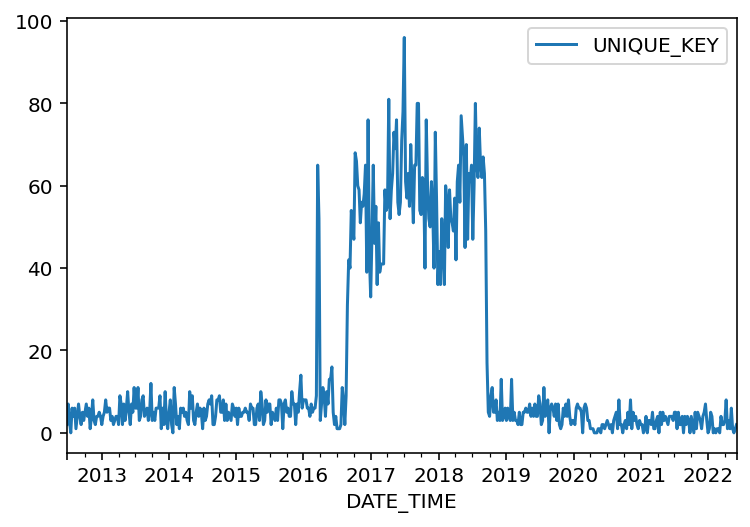

In [91]:
nm2.pivot_table(
    index='DATE_TIME',
    values='UNIQUE_KEY',
    aggfunc='count'
).resample('1W').sum().plot()

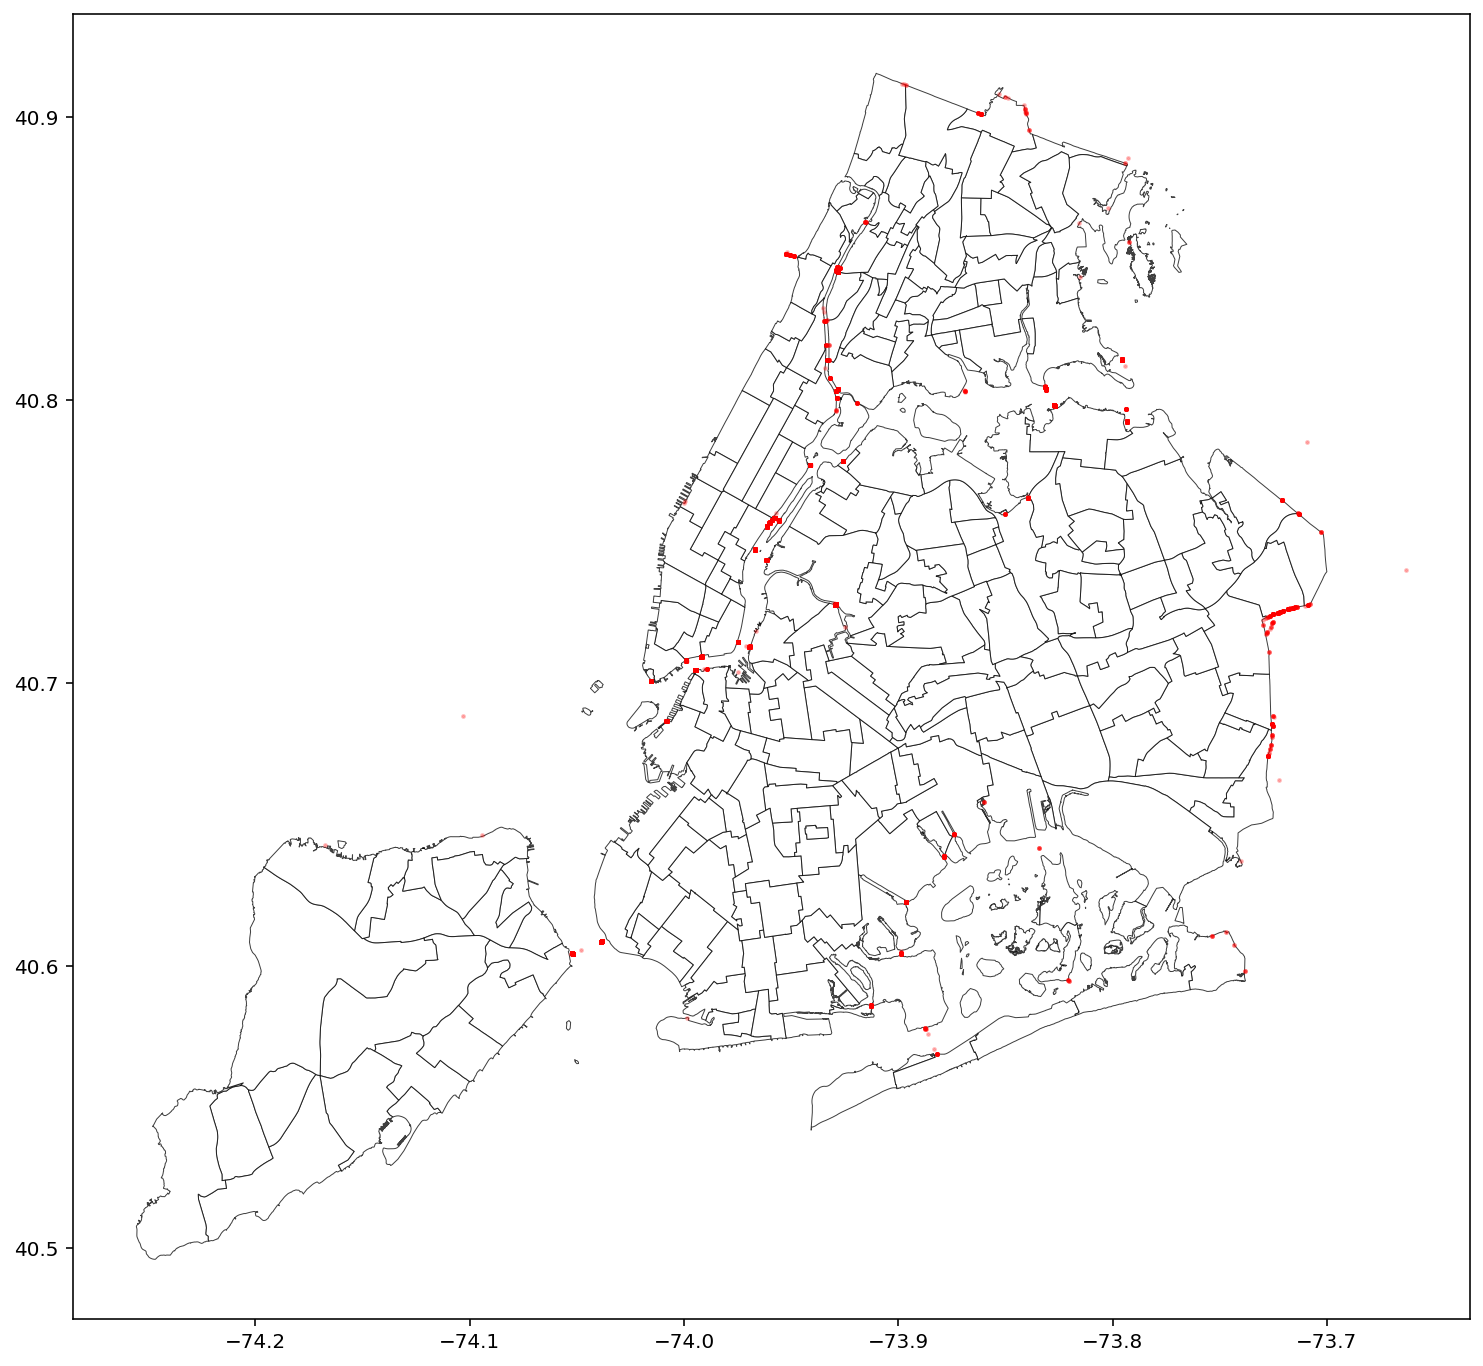

In [92]:
# The plot reveals that these are all bridge accidents
#
# Perhaps we may want to keep them in later versions
#
base = df_nyc.plot(linewidth=0.5,
                   color='White',
                   edgecolor='Black',
                   figsize=(15, 12),
                   alpha=0.75)

nm2.plot(figsize=(15, 12), c='red', markersize=2, alpha=0.25, ax=base)

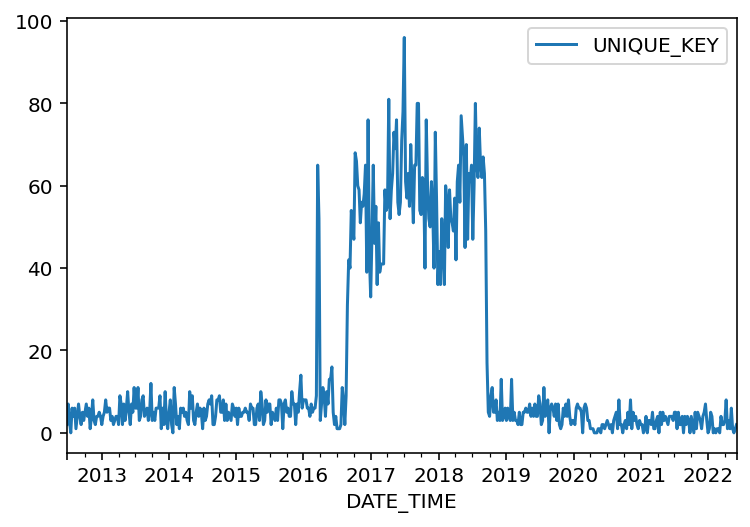

In [94]:
nm2.pivot_table(
    index='DATE_TIME',
    values='UNIQUE_KEY',
    aggfunc='count'
).resample('1W').sum().plot()

### No ZIP detected, within NYC boundaries

In [95]:
# These are the entries that are not matching with a neighborhood
# but are within the NYC boundaries.
nm3 = gdf[gdf.GEO_ZIPCODE.isnull() & mask  ]
len(nm3)

8961

In [96]:
nm3['ON_STREET_NAME'].value_counts().head(20)

VERRAZANO BRIDGE UPPER              858
BRONX WHITESTONE BRIDGE             773
BROOKLYN BRIDGE                     603
VERRAZANO BRIDGE LOWER              355
THROGS NECK BRIDGE                  344
WILLIAMSBURG BRIDGE OUTER ROADWA    315
QUEENS MIDTOWN TUNNEL               309
BROOKLYN BATTERY TUNNEL             306
CROSS BRONX EXPY                    295
ROCKAWAY BOULEVARD                  291
FDR DRIVE                           259
METROPOLITAN AVENUE                 227
TRIBOROUGH BRIDGE                   222
BROOKLYN QUEENS EXPRESSWAY          193
WILLIAMSBURG BRIDGE INNER ROADWA    190
QUEENSBORO BRIDGE LOWER ROADWAY     186
MANHATTAN BR UPPER                  175
WILLIS AVE BRIDGE                   169
VERRAZANO BRIDGE                    158
QUEENSBORO BRIDGE LOWER             144
Name: ON_STREET_NAME, dtype: int64

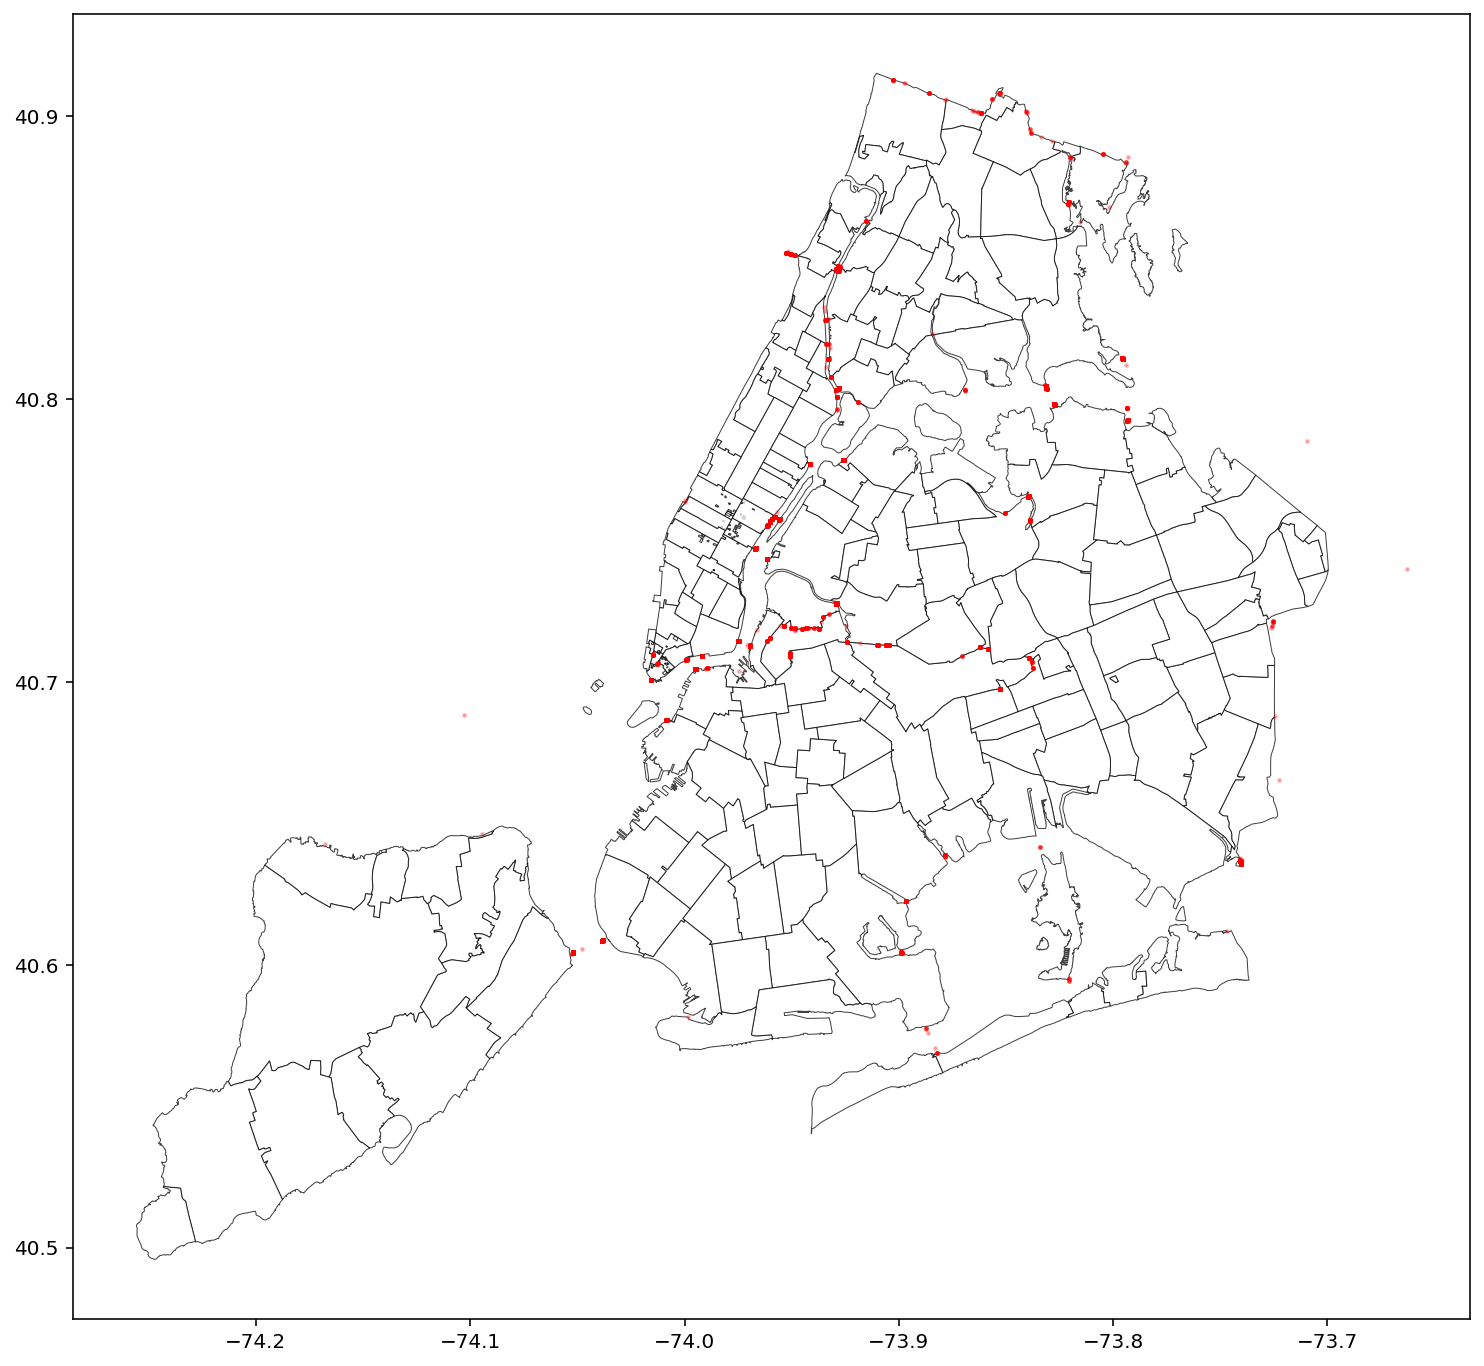

In [97]:
# The plot reveals that these are all bridge accidents
#
# Perhaps we may want to keep them in later versions
#
base = df_zip.plot(linewidth=0.5,
                   color='White',
                   edgecolor='Black',
                   figsize=(15, 12),
                   alpha=0.75)

nm3.plot(figsize=(15, 12), c='red', markersize=2, alpha=0.25, ax=base)

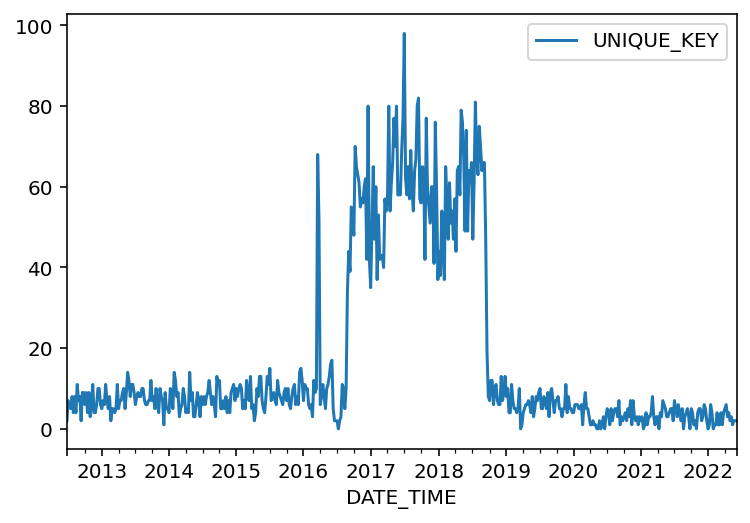

In [100]:
nm3.pivot_table(
    index='DATE_TIME',
    values='UNIQUE_KEY',
    aggfunc='count'
).resample('1W').sum().plot()

### Discrepancy between detected and reported borough

In [101]:
# Code below lists cases where the borough is incorrectly coded based on lon/lat
# TODO: Perhaps also check cases where zipcode is incorrectly coded
errors_boro = gdf[mask & ~gdf.BOROUGH.isnull() & ~gdf.GEO_BOROUGH.isnull() &
                  (gdf.GEO_BOROUGH.str.lower() != gdf.BOROUGH.str.lower())]
errors_boro = pd.DataFrame(errors_boro)

In [102]:
len(errors_boro)

2026

In [103]:
errors_boro.LOCATION.value_counts().head(10)

(40.7136, -74.0091)          92
(40.873642, -73.90797)       59
(40.8756831, -73.9083783)    58
(40.7244, -73.9818)          50
(40.7339, -73.9542)          43
(40.6999378, -73.9118079)    38
(40.87564, -73.90836)        32
(40.8772207, -73.9090451)    32
(40.699531, -73.9110367)     28
(40.68319, -73.8663)         20
Name: LOCATION, dtype: int64

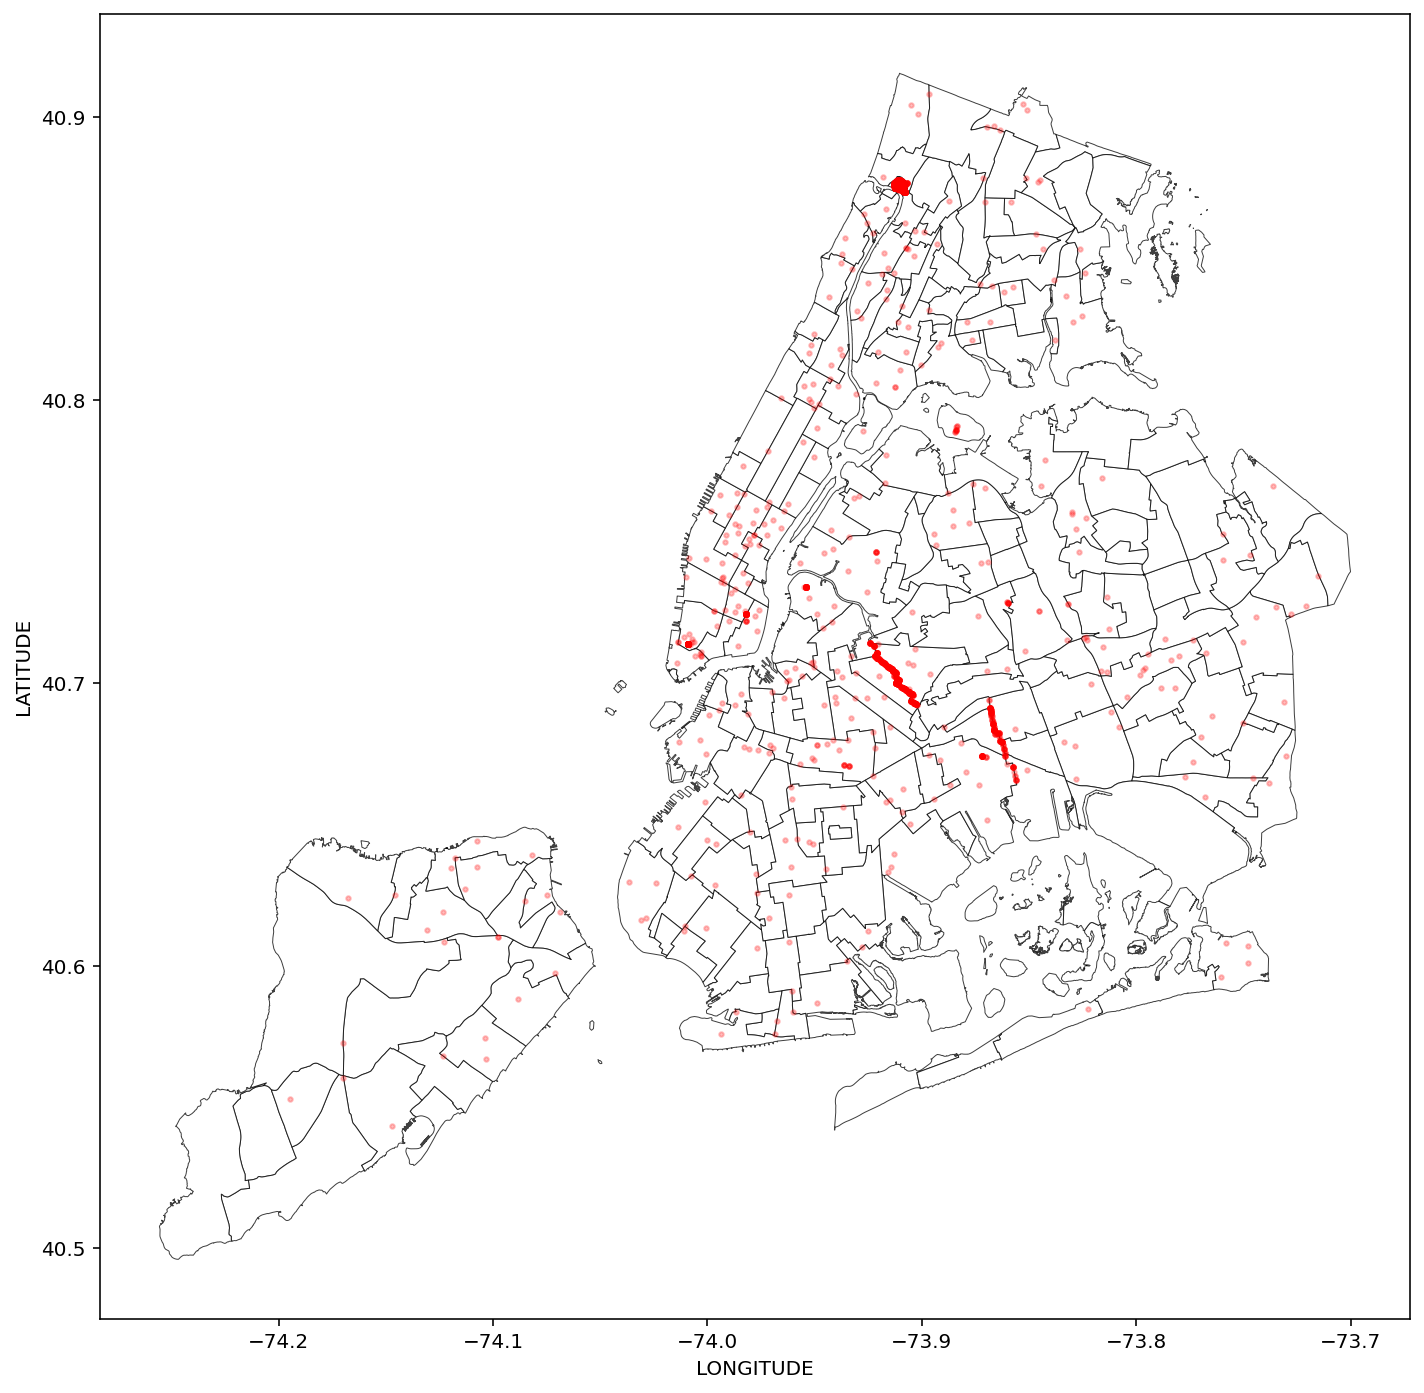

In [104]:
# The plot reveals that most are border issues
# but there are random errors spread throughout the city
base = df_nyc.plot(
    linewidth=0.5,
    color='White',
    edgecolor='Black',
    figsize=(15, 15),
    alpha=0.75)

errors_boro.plot(
    kind='scatter',
    x='LONGITUDE',
    y='LATITUDE',
    figsize=(15, 12),
    c='red',
    s=5,
    alpha=0.25, ax=base)

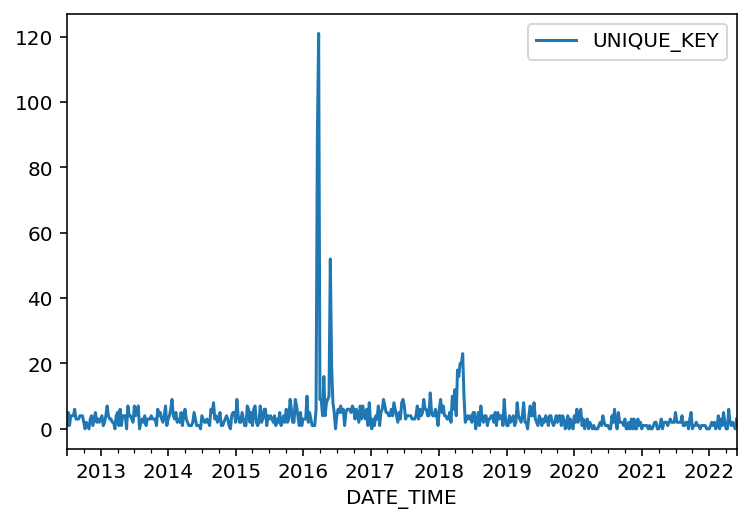

In [105]:
errors_boro.pivot_table(
    index='DATE_TIME',
    values='UNIQUE_KEY',
    aggfunc='count'
).resample('1W').sum().plot()

In [106]:
# Check cases where there was a reported borough code but not a detected one
errors_boro2 = gdf [mask & ~gdf.BOROUGH.isnull() & gdf.GEO_BOROUGH.isnull()]
errors_boro2 = pd.DataFrame(errors_boro2)
len(errors_boro2)

538

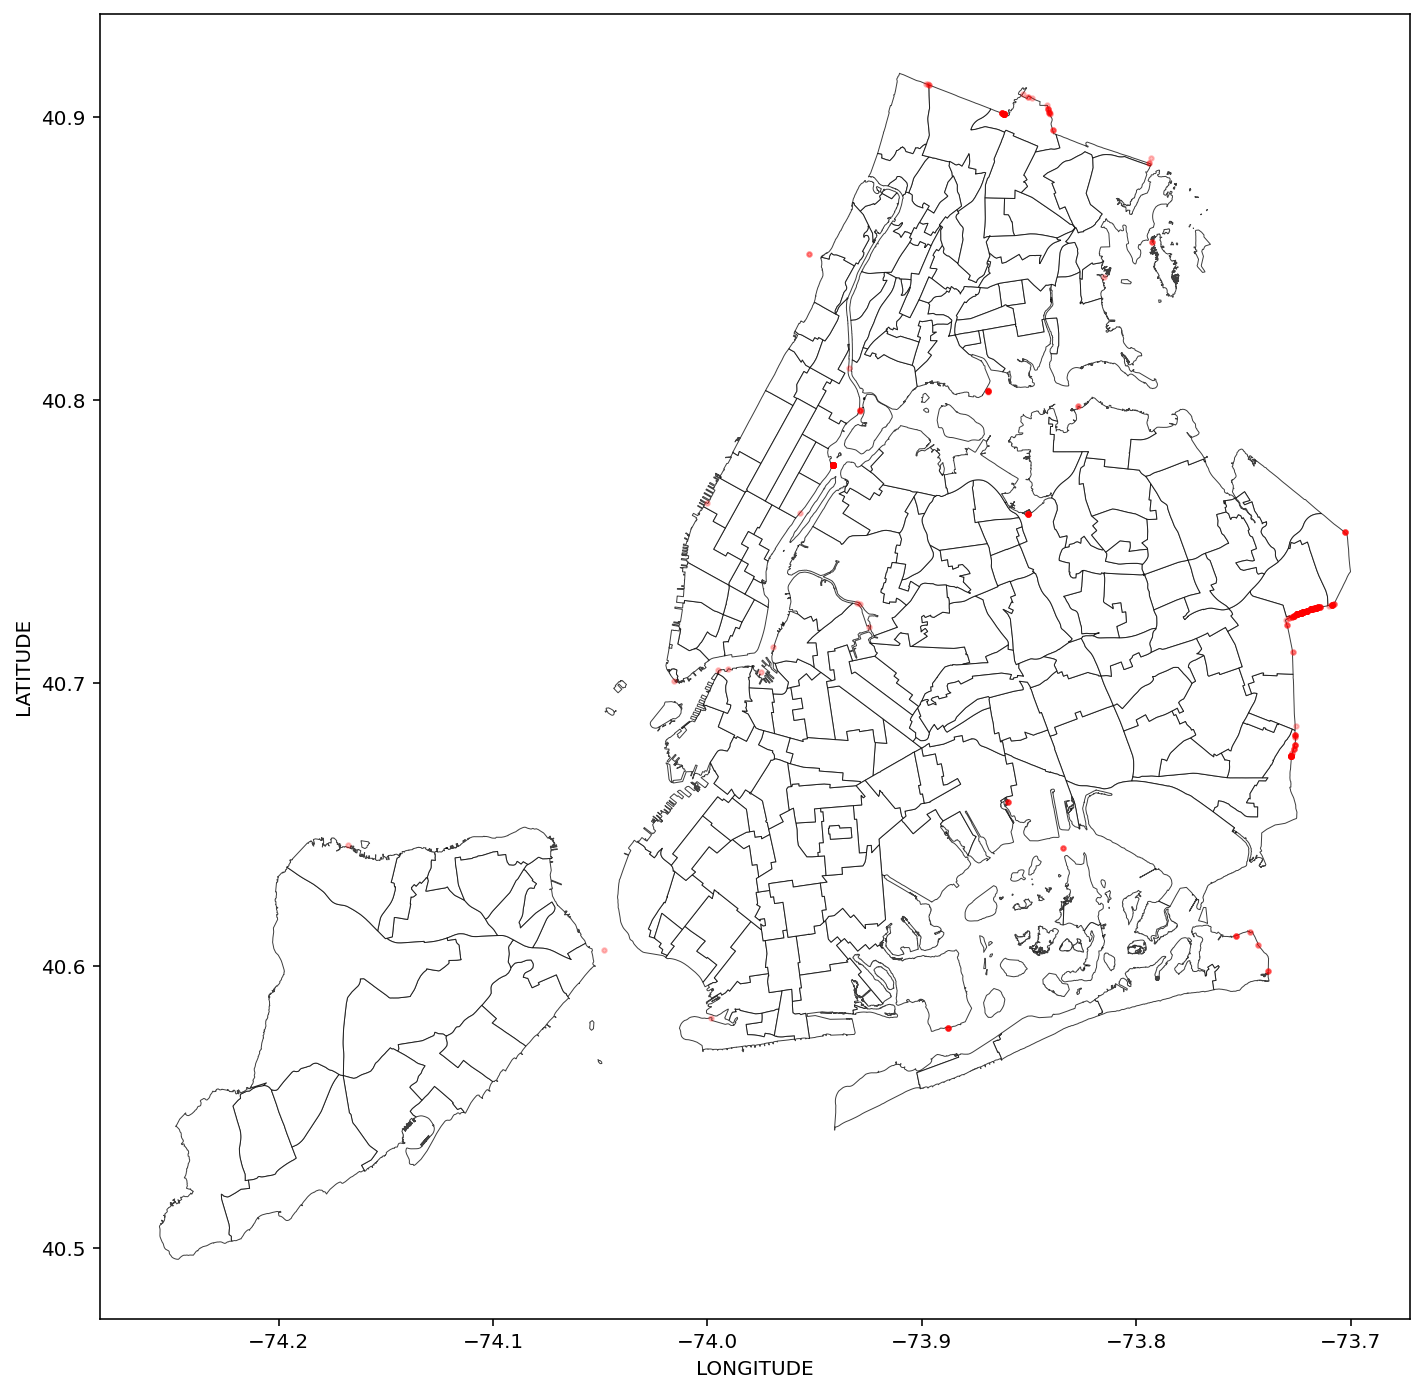

In [107]:
# The plot reveals that most are border issues
base = df_nyc.plot(
    linewidth=0.5,
    color='White',
    edgecolor='Black',
    figsize=(15, 15),
    alpha=0.75)

errors_boro2.plot(
    kind='scatter',
    x='LONGITUDE',
    y='LATITUDE',
    figsize=(15, 12),
    c='red',
    s=5,
    alpha=0.25, ax=base)

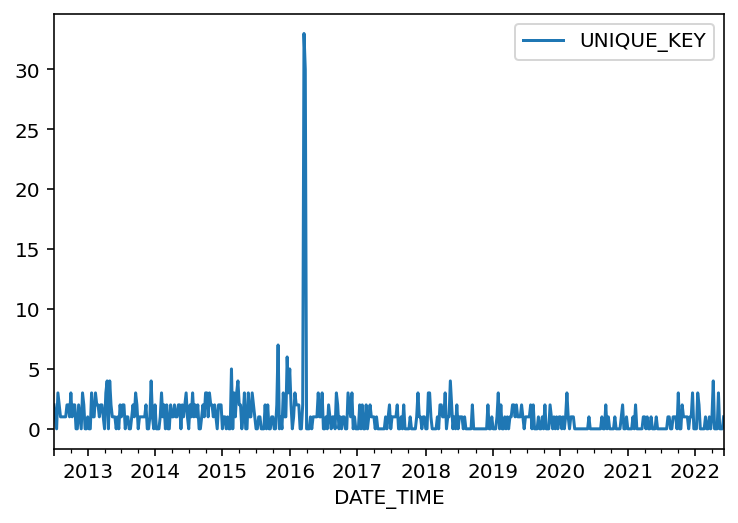

In [108]:
errors_boro2.pivot_table(
    index='DATE_TIME',
    values='UNIQUE_KEY',
    aggfunc='count'
).resample('1W').sum().plot()

### Discrepancy between detected and reported zip

In [109]:
# Code below lists cases where the borough is incorrectly coded based on lon/lat
errors_zip = gdf [ mask & ~gdf.ZIPCODE.isnull() & ~gdf.GEO_ZIPCODE.isnull() & (gdf.GEO_ZIPCODE != gdf.ZIPCODE) ]
errors_zip = pd.DataFrame(errors_zip)
len(errors_zip)

104180

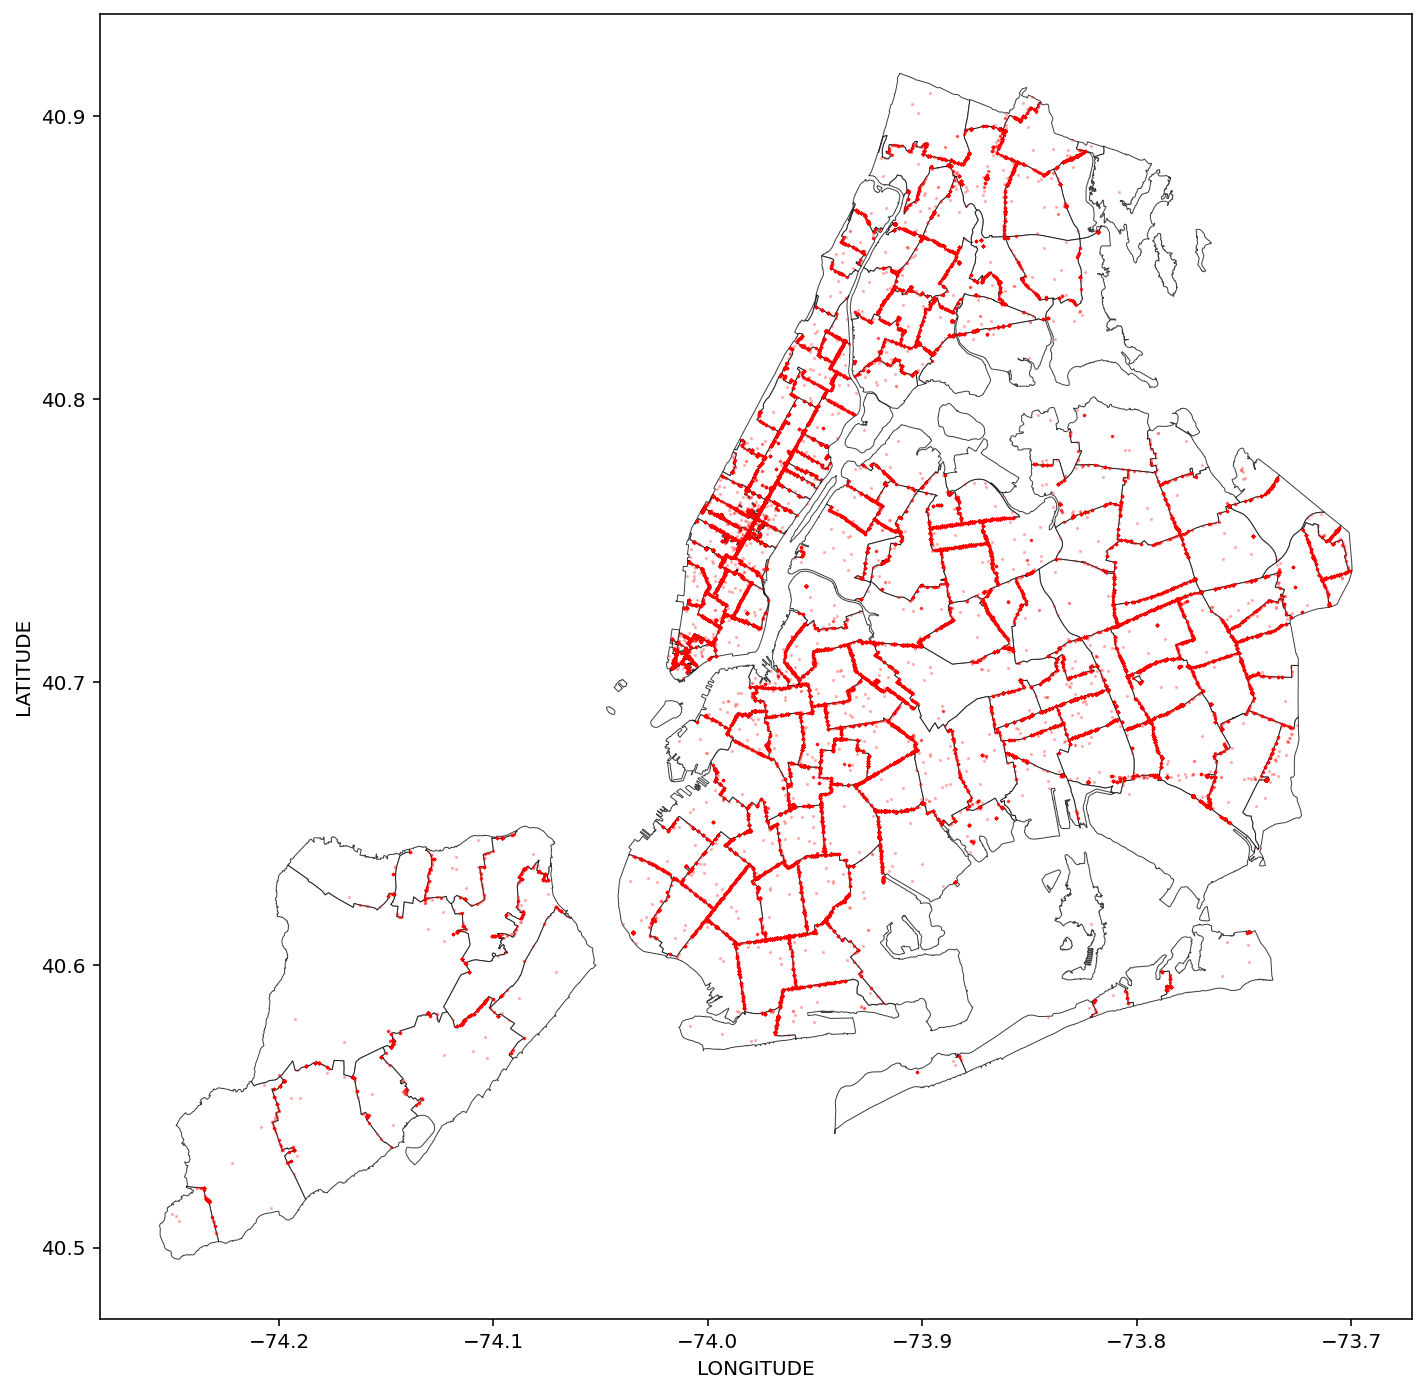

In [110]:
# The plot reveals that most are border issues
# but there are random errors spread throughout the city
base = df_zip.plot(
    linewidth=0.5,
    color='White',
    edgecolor='Black',
    figsize=(15, 15),
    alpha=0.75)

errors_zip.plot(
    kind='scatter',
    x='LONGITUDE',
    y='LATITUDE',
    figsize=(15, 12),
    c='red',
    s=0.5,
    alpha=0.25, ax=base)

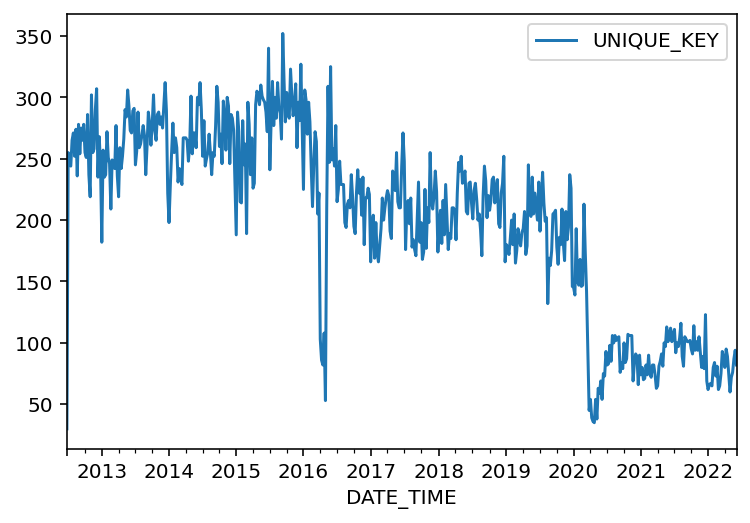

In [111]:
errors_zip.pivot_table(
    index='DATE_TIME',
    values='UNIQUE_KEY',
    aggfunc='count'
).resample('1W').sum().plot()

In [112]:
# Check cases where there was a reported ZIP code but not a detected one
errors_zip2 = gdf [ mask & ~gdf.ZIPCODE.isnull() & gdf.GEO_ZIPCODE.isnull() ]
errors_zip2 = pd.DataFrame(errors_zip2)
len(errors_zip2)

1347

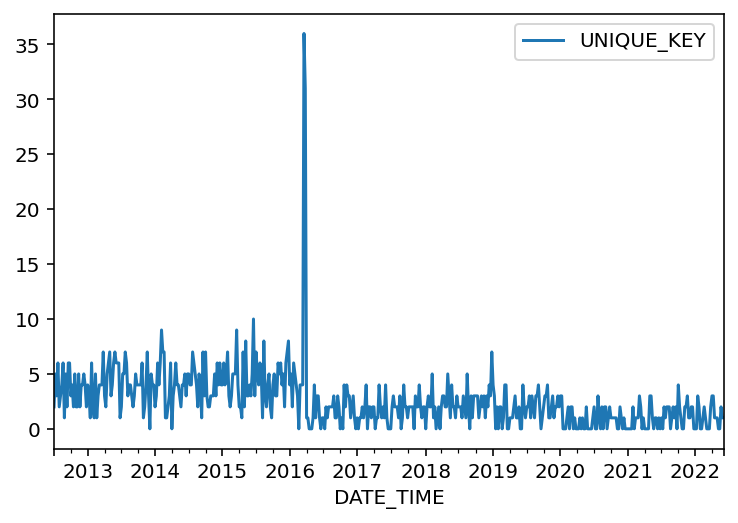

In [113]:
errors_zip2.pivot_table(
    index='DATE_TIME',
    values='UNIQUE_KEY',
    aggfunc='count'
).resample('1W').sum().plot()

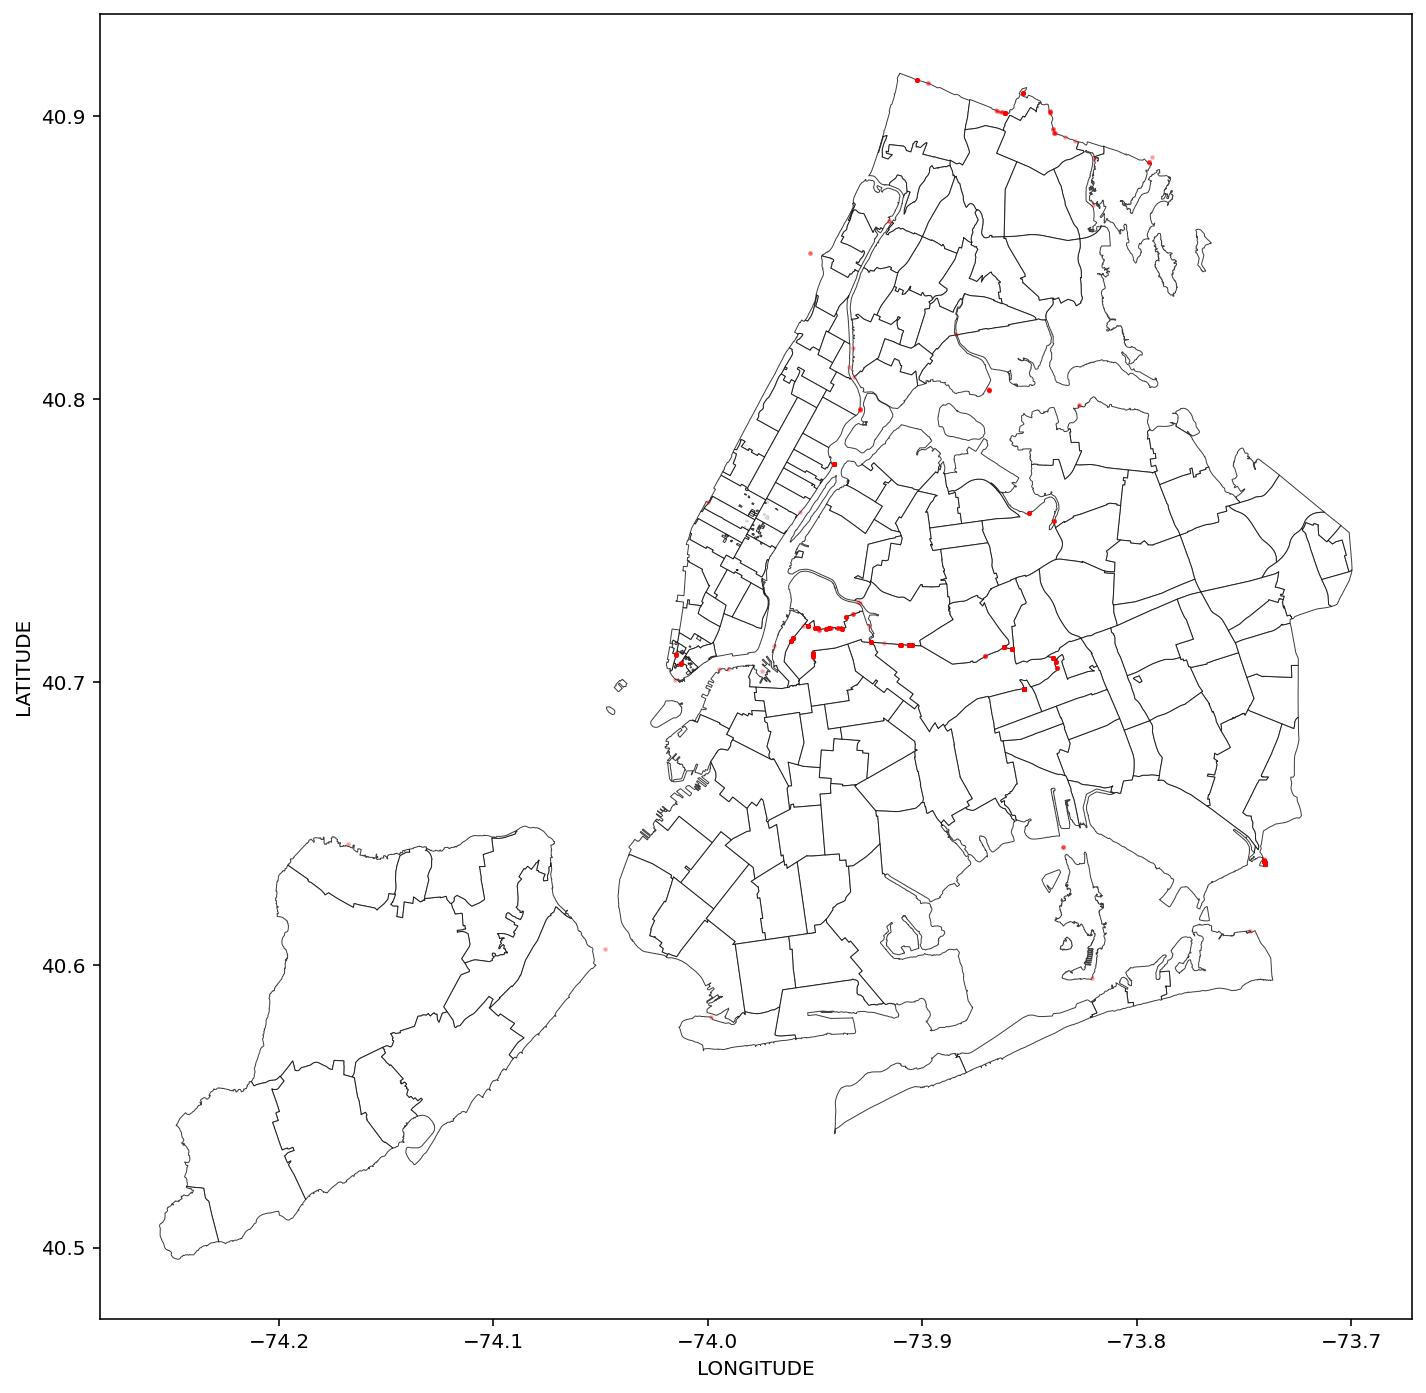

In [114]:
# The plot reveals that most are border issues
base = df_zip.plot(
    linewidth=0.5,
    color='White',
    edgecolor='Black',
    figsize=(15, 15),
    alpha=0.75)

errors_zip2.plot(
    kind='scatter',
    x='LONGITUDE',
    y='LATITUDE',
    figsize=(15, 12),
    c='red',
    s=2,
    alpha=0.25, ax=base)

## Prepare Final DataSet

In [115]:
gdf.columns.values

array(['UNIQUE_KEY', 'DATE_TIME', 'BOROUGH', 'ZIPCODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON_STREET_NAME', 'CROSS_STREET_NAME',
       'OFF_STREET_NAME', 'PERSONS_INJURED', 'PERSONS_KILLED',
       'PEDESTRIANS_INJURED', 'PEDESTRIANS_KILLED', 'CYCLISTS_INJURED',
       'CYCLISTS_KILLED', 'MOTORISTS_INJURED', 'MOTORISTS_KILLED',
       'geometry', 'GEO_BOROUGH', 'GEO_NEIGHBORHOOD', 'GEO_ZIPCODE'],
      dtype=object)

In [116]:
# Defines LON/LAT entries that are plausibly within NYC
# We will use the mask to set to NULL all other lat/lon values
# The analysis above indicates that the lon/lat that are within the mask
# but "do not match" are actually, fine and most are border cases
mask = (gdf.LATITUDE > 40) & (gdf.LATITUDE < 41) & (gdf.LONGITUDE < -72) & (gdf.LONGITUDE > -74.5)

gdf.loc[~mask, 'LATITUDE'] = None
gdf.loc[~mask, 'LONGITUDE'] = None

In [117]:
# Keeping the ZIP and BOROUGH from the original dataset 
# but changing its names, to distinguish from the detected
# ones from the shapefiles

gdf = gdf.rename(
    {
        'ZIPCODE': 'REPORTED_ZIPCODE',
        'BOROUGH': 'REPORTED_BOROUGH',
    },
    axis='columns')

gdf = gdf.rename(
    {
        'GEO_ZIPCODE': 'ZIPCODE',
        'GEO_BOROUGH': 'BOROUGH',
        'GEO_NEIGHBORHOOD': 'NEIGHBORHOOD'
    },
    axis='columns')

In [118]:
# Reorder the columns, dropping columns we do not need

columns = [
    'UNIQUE_KEY', 'DATE_TIME', 'LATITUDE', 'LONGITUDE', 
    'ZIPCODE', 'NEIGHBORHOOD', 'BOROUGH', 
    'PERSONS_INJURED', 'PERSONS_KILLED', 
    'PEDESTRIANS_INJURED', 'PEDESTRIANS_KILLED', 
    'CYCLISTS_INJURED', 'CYCLISTS_KILLED',
    'MOTORISTS_INJURED', 'MOTORISTS_KILLED', 
    'ON_STREET_NAME', 'CROSS_STREET_NAME', 'OFF_STREET_NAME',
    'REPORTED_ZIPCODE', 'REPORTED_BOROUGH'
]

gdf = gdf[columns]

In [119]:
# Sort by date
gdf = gdf.sort_values('DATE_TIME')

In [120]:
final_df = pd.DataFrame(gdf)

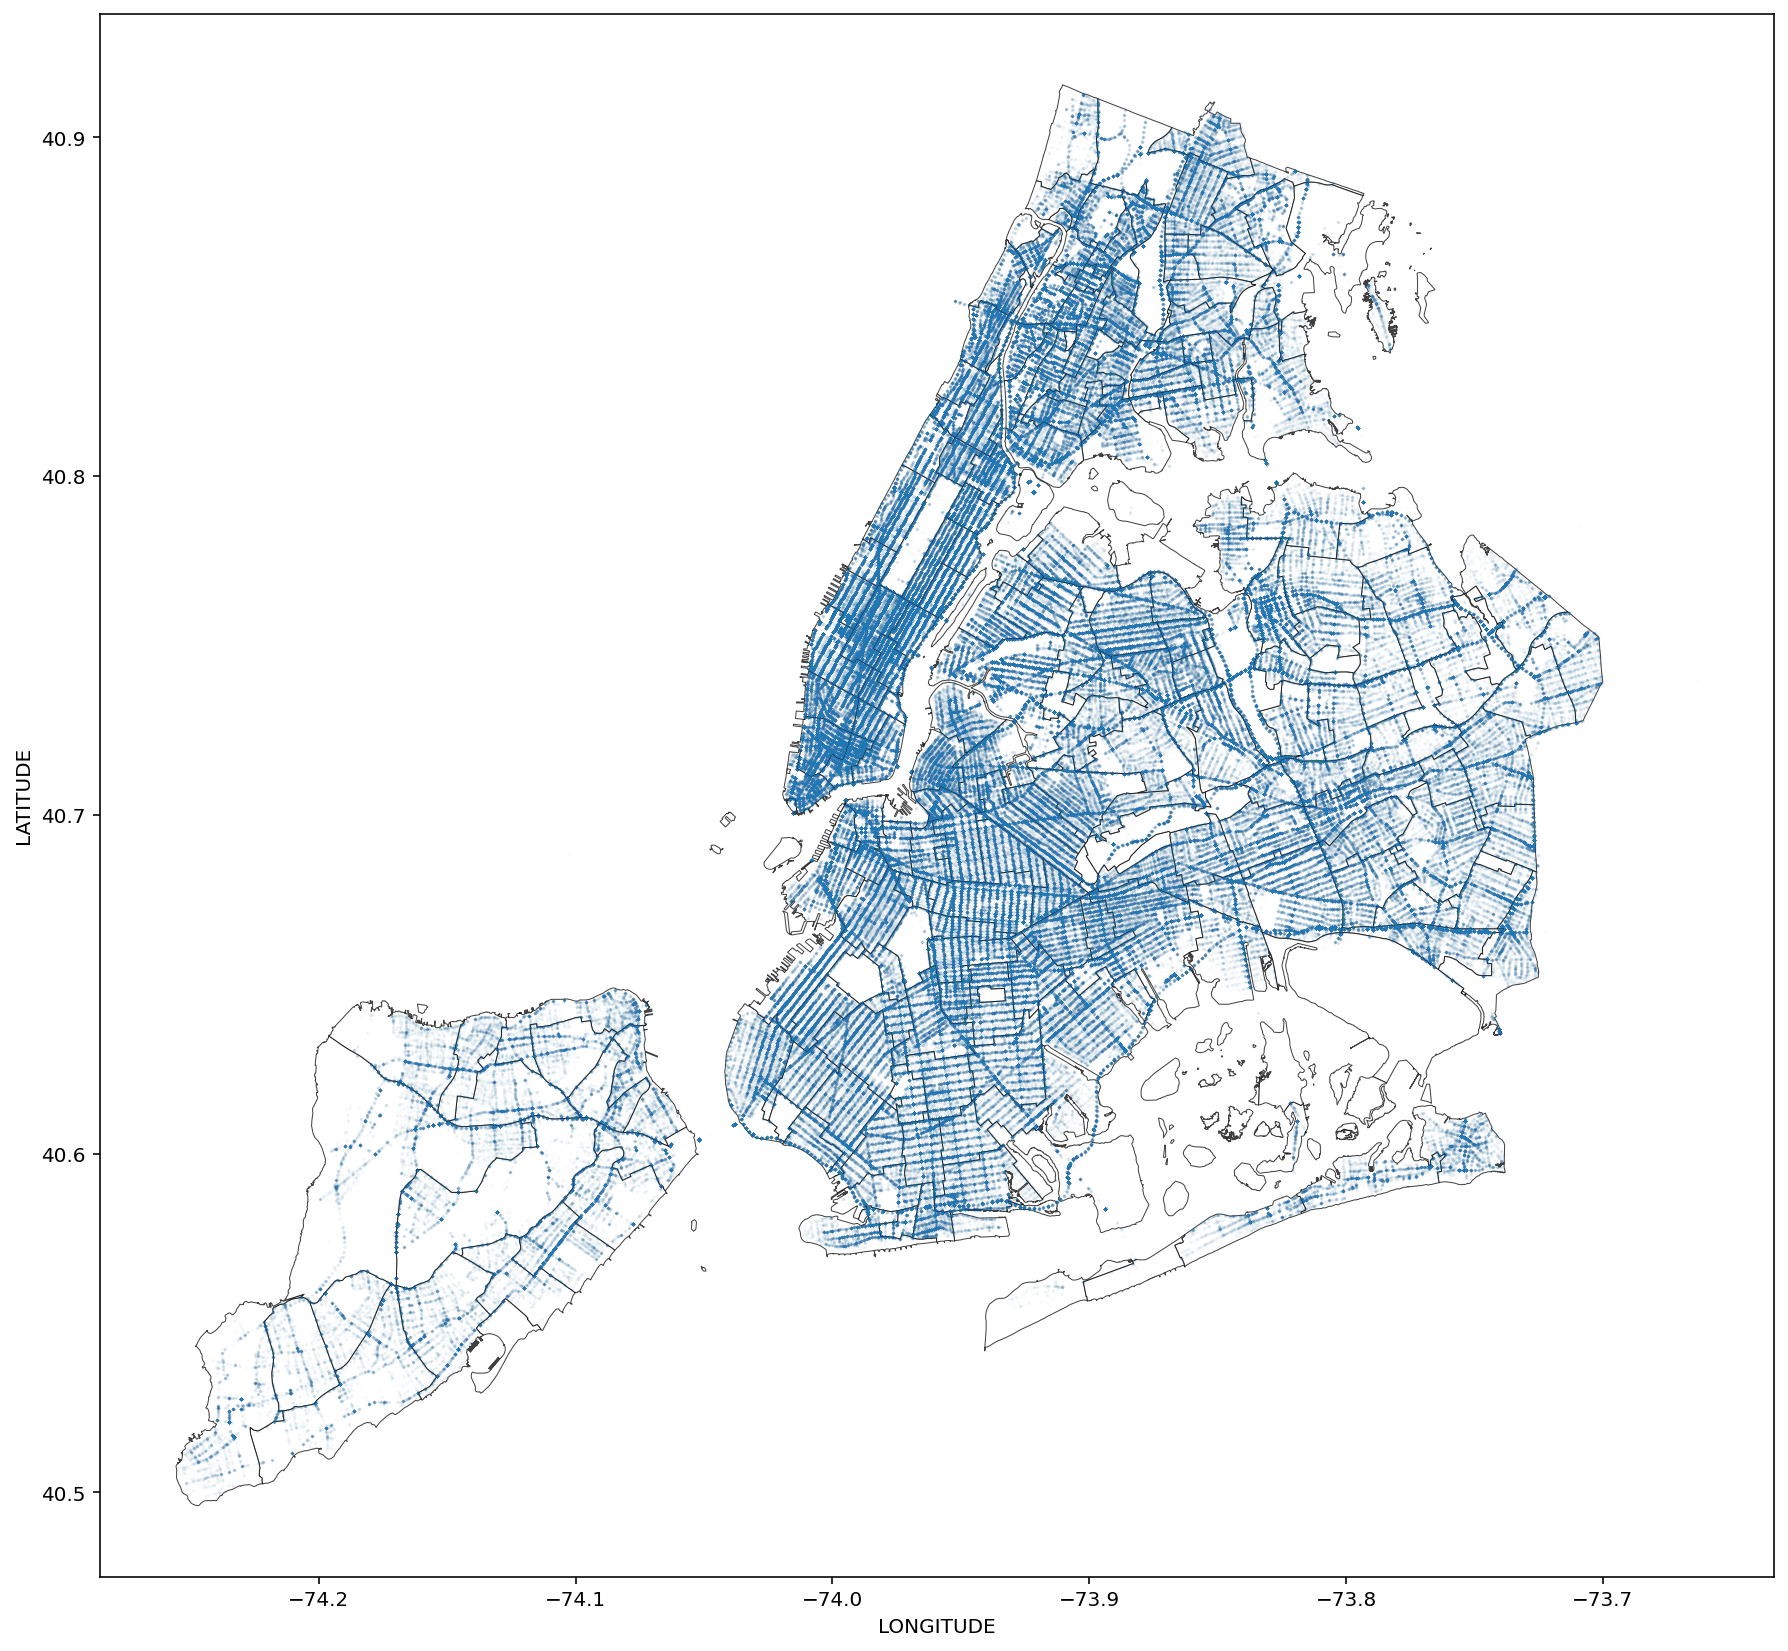

In [121]:
base = df_nyc.plot(
    linewidth=0.5,
    color='White',
    edgecolor='Black',
    figsize=(15, 15),
    alpha=0.75)

scatterplot = final_df.plot(
    kind='scatter',
    x='LONGITUDE',
    y='LATITUDE',
    s=0.5,
    alpha=0.02,
    ax=base)

In [122]:
final_df.to_csv('collisions.csv.gz', index=False, compression='gzip')

In [123]:
# 4050018: Panos :-)
final_df.query('UNIQUE_KEY  == "4050018"').T

490276
UNIQUE_KEY                                              4050018
DATE_TIME                                   2018-12-21 20:10:00
LATITUDE                                              40.742832
LONGITUDE                                             -74.00771
ZIPCODE                                                   10011
NEIGHBORHOOD         Hudson Yards-Chelsea-Flatiron-Union Square
BOROUGH                                               Manhattan
PERSONS_INJURED                                               0
PERSONS_KILLED                                                0
PEDESTRIANS_INJURED                                           0
PEDESTRIANS_KILLED                                            0
CYCLISTS_INJURED                                              0
CYCLISTS_KILLED                                               0
MOTORISTS_INJURED                                             0
MOTORISTS_KILLED                                              0
ON_STREET_NAME                 10 AVENUE                       
CROSS_STREET_NAME                                WEST 15 STREET
OFF_STREET_NAME                                             NaN
REPORTED_ZIPCODE                                          10011
REPORTED_BOROUGH                                      MANHATTAN

## Contributing factor and Vehicle type

* Examine the contents of Contributing factor and Vehicle type. Replace noisy values with UNSPECIFIED

* Add a column "NUM_VEHICLES" to show the number of vehicles involved in the accident. Check that we do not have NaNs before a real value in CAUSE and in VEHICLE TYPE, and that the two columns (CAUSE AND VEHICLE) agree in the number.

In [124]:
ct_df

CAUSE  \
UNIQUE_KEY                                   
0000022                        UNSPECIFIED   
0000022                        UNSPECIFIED   
0000023                        UNSPECIFIED   
0000023                        UNSPECIFIED   
0000024                  OVERSIZED VEHICLE   
...                                    ...   
4535225                        UNSPECIFIED   
4535226     DRIVER INATTENTION/DISTRACTION   
4535228        TRAFFIC CONTROL DISREGARDED   
4535228                        UNSPECIFIED   
4535233                       UNSAFE SPEED   

                                   VEHICLE_TYPE  VEHICLE  
UNIQUE_KEY                                                
0000022           SPORT UTILITY / STATION WAGON        1  
0000022                                     VAN        2  
0000023                                    TAXI        1  
0000023                                    TAXI        2  
0000024                                     BUS        1  
...                                         ...      ...  
4535225                                   SEDAN        2  
4535226                                   SEDAN        1  
4535228     STATION WAGON/SPORT UTILITY VEHICLE        1  
4535228                                   SEDAN        2  
4535233                                   SEDAN        1  

[3582862 rows x 3 columns]

In [125]:
len(set(ct_df.index) - set(final_df.UNIQUE_KEY.values))

3141

In [126]:
ct_df.CAUSE.value_counts()

UNSPECIFIED                                              2097952
DRIVER INATTENTION/DISTRACTION                            455784
FAILURE TO YIELD RIGHT-OF-WAY                             125572
FOLLOWING TOO CLOSELY                                     118141
OTHER VEHICULAR                                            91712
BACKING UNSAFELY                                           78512
PASSING OR LANE USAGE IMPROPER                             61112
FATIGUED/DROWSY                                            59069
TURNING IMPROPERLY                                         55297
PASSING TOO CLOSELY                                        52888
UNSAFE LANE CHANGING                                       43264
TRAFFIC CONTROL DISREGARDED                                38119
DRIVER INEXPERIENCE                                        35024
UNSAFE SPEED                                               26446
LOST CONSCIOUSNESS                                         25388
PAVEMENT SLIPPERY        

In [127]:
# We replace noisy causes with UNSPECIFIED and not with NaN, as NaN is used to mean "no vehicle"
import numpy as np
ct_df.CAUSE = ct_df.CAUSE.replace(to_replace='1', value='UNSPECIFIED')
ct_df.CAUSE = ct_df.CAUSE.replace(to_replace='80', value='UNSPECIFIED')
ct_df.CAUSE = ct_df.CAUSE.replace(to_replace='ILLNES', value='ILLNESS')

In [128]:
ct_df.VEHICLE_TYPE.value_counts()

SEDAN                                  896523
PASSENGER VEHICLE                      762459
STATION WAGON/SPORT UTILITY VEHICLE    720048
SPORT UTILITY / STATION WAGON          333564
TAXI                                   144285
                                        ...  
EPO                                         1
BLOCK                                       1
UTV                                         1
HI LO                                       1
EMS FDNY B                                  1
Name: VEHICLE_TYPE, Length: 1553, dtype: int64

In [129]:
# Also consult https://data.ny.gov/api/assets/83055271-29A6-4ED4-9374-E159F30DB5AE

ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='STATION WAGON/SPORT UTILITY VEHICLE', value='SPORT UTILITY / STATION WAGON')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='SUBN', value='SPORT UTILITY / STATION WAGON')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='SUBN/', value='SPORT UTILITY / STATION WAGON')

ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='WAGON', value='SPORT UTILITY / STATION WAGON')

ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='BU', value='BUS')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='BS', value='BUS')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='SCHOOL BUS', value='BUS')

ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='P/SH', value='POWER SHOVEL')



ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='MULTI-WHEELED VEHICLE', value='LARGE COM VEH(6 OR MORE TIRES)')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='SMALL', value='SMALL COM VEH(4 TIRES)')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='SMALL COM VEH(4 TIRES) ', value='SMALL COM VEH(4 TIRES)')

ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='LIVER', value='LIVERY VEHICLE')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='LIMOU', value='LIVERY VEHICLE')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='LIMO', value='LIVERY VEHICLE')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='LIMO/', value='LIVERY VEHICLE')

ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='FORKL', value='FORK LIFT')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='FORK', value='FORK LIFT')

ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='DUMP', value='DUMP TRUCK')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='DUMPS', value='DUMP TRUCK')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='DUMPT', value='DUMP TRUCK')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='PUMP', value='DUMP TRUCK')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='DP', value='DUMP TRUCK')


ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='GARBA', value='GARBAGE OR REFUSE')


ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='CONV', value='CONVERTIBLE')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='CONVE', value='CONVERTIBLE')

ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='SP', value='SNOW PLOW')

ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='2 DR SEDAN', value='SEDAN')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='4 DR SEDAN', value='SEDAN')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='SUDAN', value='SEDAN')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='SE', value='SEDAN')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='4DS', value='SEDAN')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='4DSD', value='SEDAN')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='3-DOOR', value='SEDAN')


ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='VAN CAMPER', value='VAN')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='VAN T', value='VAN')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='VAN F', value='VAN')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='VAN A', value='VAN')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='VAN W', value='VAN')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='VAN/B', value='VAN')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='VAB', value='VAN')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='VANG', value='VAN')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='VAN C', value='VAN')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='VAN/T', value='VAN')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='VANETTE', value='VAN')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='VAN`', value='VAN')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='VAV', value='VAN')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='VN', value='VAN')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='VAN (', value='VAN')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='ENCLOSED BODY - REMOVABLE ENCLOSURE', value='VAN')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='ENCLOSED BODY - NONREMOVABLE ENCLOSURE', value='VAN')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='ENCLO', value='VAN')


ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='MOTOR HOME', value='R/V')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='MOTORIZED HOME', value='R/V')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='RV', value='R/V')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='R/V C', value='R/V')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='RV/TR', value='R/V')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='H/WH', value='R/V') # house on wheels


ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='AM', value='AMBULANCE')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='AMB', value='AMBULANCE')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='AMBU', value='AMBULANCE')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='AMBUL', value='AMBULANCE')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='ANBUL', value='AMBULANCE')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='AMABU', value='AMBULANCE')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='AMULA', value='AMBULANCE')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='ABULA', value='AMBULANCE')

ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='BICYC', value='BICYCLE')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='BIKE', value='BICYCLE')

ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='TANK', value='TANK TRUCK')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='TANKE', value='TANK TRUCK')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='TANKER', value='TANK TRUCK')

ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='OTHER', value='UNKNOWN')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='UNK', value='UNKNOWN')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='UNK,', value='UNKNOWN')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='UNKN', value='UNKNOWN')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='UNKNO', value='UNKNOWN')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='UNKNOWN', value='UNKNOWN')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='UNKOW', value='UNKNOWN')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='UNNKO', value='UNKNOWN')

ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='SC', value='SCOOTER')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='SCOO', value='SCOOTER')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='SCOOT', value='SCOOTER')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='MOTER', value='SCOOTER')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='MOPD', value='SCOOTER')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='MOPAD', value='SCOOTER')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='MOPET', value='SCOOTER')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='MOPEN', value='SCOOTER')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='E BIK', value='E-BIKE')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='E-BIK', value='E-BIKE')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='E/BIK', value='E-BIKE')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='MINIBIKE', value='SCOOTER')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='MOPED', value='SCOOTER')



ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='US PO', value='USPS')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='USPOS', value='USPS')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='USPS2', value='USPS')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='USPST', value='USPS')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='U.S P', value='USPS')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='U.S.', value='USPS')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='USPS TRUCK', value='USPS')

ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='COMME', value='COMMERCIAL')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='COM', value='COMMERCIAL')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='COMM', value='COMMERCIAL')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='COM T', value='COMMERCIAL')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='COM.', value='COMMERCIAL')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='COMMM', value='COMMERCIAL')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='COMER', value='COMMERCIAL')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='COMMM', value='COMMERCIAL')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='COM.', value='COMMERCIAL')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='COMIX', value='COMMERCIAL')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='COMPA', value='COMMERCIAL')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='COMB', value='COMMERCIAL')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='COMMU', value='COMMERCIAL')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='COMM.', value='COMMERCIAL')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='C0MME', value='COMMERCIAL')

ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='PASS', value='PASSENGER VEHICLE')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='PAS', value='PASSENGER VEHICLE')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='PASSE', value='PASSENGER VEHICLE')



ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='PEDIC', value='PEDICAB')

ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='TOW T', value='TOW TRUCK / WRECKER')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='TOW', value='TOW TRUCK / WRECKER')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='TOW TRUCK', value='TOW TRUCK / WRECKER')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='TOWTR', value='TOW TRUCK / WRECKER')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='TOW-T', value='TOW TRUCK / WRECKER')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='TOWIN', value='TOW TRUCK / WRECKER')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='TOWER', value='TOW TRUCK / WRECKER')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='G TOW', value='TOW TRUCK / WRECKER')



ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='TKP', value='PICK-UP TRUCK')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='PK', value='PICK-UP TRUCK')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='PICK', value='PICK-UP TRUCK')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='PICK-', value='PICK-UP TRUCK')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='PICKU', value='PICK-UP TRUCK')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='PICKUP WITH MOUNTED CAMPER', value='PICK-UP TRUCK')

ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='FLAT BED', value='PICK-UP TRUCK')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='FLAT RACK', value='PICK-UP TRUCK')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='FLATB', value='PICK-UP TRUCK')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='FLAT', value='PICK-UP TRUCK')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='FLAT RACK', value='PICK-UP TRUCK')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='FLATB', value='PICK-UP TRUCK')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='BACK', value='PICK-UP TRUCK')

ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='FDNY', value='FIRE TRUCK')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='FIRE', value='FIRE TRUCK')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='FIRET', value='FIRE TRUCK')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='FD NY', value='FIRE TRUCK')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='FD TR', value='FIRE TRUCK')
 

    

ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='TRACTOR TRUCK DIESEL', value='TRACTOR TRUCK')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='TRACTOR TRUCK GASOLINE', value='TRACTOR TRUCK')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='TRAC.', value='TRACTOR TRUCK')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='TRAC', value='TRACTOR TRUCK')


ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='TRAIL', value='TRAILER')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='TR', value='TRAILER')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='TRL', value='TRAILER')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='TRAIL', value='TRAILER')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='TRLR', value='TRAILER')


ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='SEMI', value='TRUCK')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='SEMI-', value='TRUCK')

ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='MACK', value='TRUCK')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='TK', value='TRUCK')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='TRACT', value='TRUCK')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='TRK', value='TRUCK')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='TRACK', value='TRUCK')


ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='FB', value='BOX TRUCK')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='BOX T', value='BOX TRUCK')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='BOX', value='BOX TRUCK')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='BOXTR', value='BOX TRUCK')


ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='MOTOR', value='MOTORCYCLE')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='MINICYCLE', value='MOTORCYCLE')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='MOTORBIKE', value='MOTORCYCLE')

ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='DSNY', value='SANITATION')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='DS', value='SANITATION')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='SANIT', value='SANITATION')

ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='DELV', value='DELIVERY TRUCK')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='DEL', value='DELIVERY TRUCK')

ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='RD/S', value='ROAD SWEEPER')
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='OML/', value='LIVERY VEHICLE') # OMNIBUS LIVERY

ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='FIRE TRUCK', value='FIRETRUCK')


ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='TRACTOR TR', value='TRACTOR TRUCK') 
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='TRACTOR', value='TRACTOR TRUCK') 

ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='EBIKE', value='E-BIKE') 

ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='FDNY TRUCK', value='FIRETRUCK') 


ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='PICK UP TR', value='PICK-UP TRUCK') 

ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='GARBAGE TR', value='E-SCOOTER') 

ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='AMBULANCE`', value='AMBULANCE') 
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='ALMBULANCE', value='AMBULANCE') 
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='AMUBULANCE', value='AMBULANCE') 
ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace='AMULANCE', value='AMBULANCE') 





In [130]:
import ngram
import math
freq = ct_df.VEHICLE_TYPE.value_counts()
vtypes = set(ct_df.VEHICLE_TYPE.values)

similarities = []
for t1 in vtypes:
    for t2 in vtypes:
        s = ngram.NGram.compare(t1, t2, n=2)
        f1 = freq.loc[t1]
        f2 = freq.loc[t2]
        r = abs(math.log10(f1/f2))
        f = f1 + f2
        if f2 > f1:
            fr1 = f2
            fr2 = f1
            tp1 = t2
            tp2 = t1
        else:
            fr1 = f1
            fr2 = f2
            tp1 = t1
            tp2 = t2
            
        sim = {
            "t1" : tp1,
            "f1" : fr1,
            "t2" : tp2,
            "f2" : fr2,
            "sim" : s,
            "ratio" : r
        }
            
        if t1>t2 and s>0.1 and f > 1000 and r>1.5: # and min(f1,f2)<200:
            similarities.append(sim)

pd.DataFrame(similarities).sort_values('sim', ascending=False).head(50)

t1      f1          t2   f2       sim     ratio
840           E-SCOOTER    2987    E-SCOTER    1  0.750000  3.475235
717          DUMP TRUCK    7071   DUMPTRUCK    1  0.642857  3.849481
895           AMBULANCE   10178  AMBULCANCE    1  0.642857  4.007662
647        MOTORSCOOTER    1121  MOTORSCOOT    4  0.625000  2.447546
900           E-SCOOTER    2987    E-SOOTER    1  0.615385  3.475235
703           FIRETRUCK    2617    FIRTRUCK    1  0.615385  3.417804
874           AMBULANCE   10178    ABULANCE    2  0.615385  3.706632
47            AMBULANCE   10178    AMBULANE    2  0.615385  3.706632
870           AMBULANCE   10178    AMBULACE    2  0.615385  3.706632
621           E-SCOOTER    2987    ESCOOTER    1  0.615385  3.475235
38            BOX TRUCK   46324    BOXTRUCK    1  0.615385  4.665806
198       PICK-UP TRUCK   92931  PICK TRUCK    1  0.588235  4.968161
201       PICK-UP TRUCK   92931  PICK-UP TR    5  0.588235  4.269191
325             SCOOTER    2937    ESCOOTER    1  0.583333  3.467904
848           AMBULANCE   10178   EMBULANCE    1  0.571429  4.007662
720           AMBULANCE   10178   AMBULENCE    6  0.571429  3.229511
906           E-SCOOTER    2987   E SCOOTER    3  0.571429  2.998114
166                 BUS   60579        BUSS    2  0.571429  4.481292
871           AMBULANCE   10178   AMBULAMCE    1  0.571429  4.007662
869           AMBULANCE   10178   AMBUKANCE    1  0.571429  4.007662
1007            UNKNOWN  148661      UNKOWN    2  0.545455  4.871167
267             UNKNOWN  148661      UNKNOW    1  0.545455  5.172197
269             UNKNOWN  148661      UKNOWN    3  0.545455  4.695076
314             SCOOTER    2937   E SCOOTER    3  0.538462  2.990783
111             SCOOTER    2937  SCOOTER NO    1  0.500000  3.467904
163             SCOOTER    2937  SCOOTER GA    2  0.500000  3.166874
224             SCOOTER    2937     SCOTTER    1  0.500000  3.467904
873           AMBULANCE   10178    AMBIANCE    1  0.500000  4.007662
830             UNKNOWN  148661  UNKNOWN VE    2  0.500000  4.871167
107             BICYCLE   55512    UNICYCLE    2  0.461538  4.443357
832             UNKNOWN  148661       UNKWN    1  0.454545  5.172197
688              E-BIKE    4802      E BIKE    2  0.454545  3.380392
799          DUMP TRUCK    7071   DOT TRUCK    1  0.437500  3.849481
289           FIRETRUCK    2617  FIRET TRUC    1  0.437500  3.417804
787              E-BIKE    4802  UNI E-BIKE    1  0.428571  3.681422
470   PASSENGER VEHICLE  762539   PASSENGER   11  0.428571  4.840869
370       PICK-UP TRUCK   92931  PICKUP TRU   10  0.421053  3.968161
520          TANK TRUCK    1443  TOWE TRUCK    1  0.411765  3.159266
138          TANK TRUCK    1443  WORK TRUCK    1  0.411765  3.159266
1019         TANK TRUCK    1443  PICK TRUCK    1  0.411765  3.159266
211       PICK-UP TRUCK   92931     PICK-UP    1  0.411765  4.968161
1026         TANK TRUCK    1443  MACK TRUCK    3  0.411765  2.682145
645        MOTORSCOOTER    1121    ESCOOTER    1  0.411765  3.049606
103                 BUS   60579     BLU BUS    1  0.400000  4.782322
291           FIRETRUCK    2617    FD TRUCK    4  0.400000  2.815744
684             BICYCLE   55512  E-UNICYCLE    2  0.400000  4.443357
860   GARBAGE OR REFUSE    3783     GARBAGE    1  0.400000  3.577836
785           BOX TRUCK   46324    FD TRUCK    4  0.400000  4.063746
636        MOTORSCOOTER    1121   E SCOOTER    3  0.388889  2.572484
756           BOX TRUCK   46324       TRUCK  947  0.384615  1.689456

In [131]:
# Replace all low-frequency vehicle types with UNKNOWN

# freq = ct_df.VEHICLE_TYPE.value_counts()

# replace = freq [ freq <= 10]
# for r in replace.index.values:
#    ct_df.VEHICLE_TYPE = ct_df.VEHICLE_TYPE.replace(to_replace=r, value='UNKNOWN')


In [132]:
ct_df.to_csv('collisions-causes.csv.gz', index=False, compression='gzip')

In [133]:
t_end = datetime.now()

t_end

datetime.datetime(2022, 6, 8, 23, 13, 44, 88769)

In [134]:
t_end - t_start

datetime.timedelta(seconds=1111, microseconds=57324)

# MySQL

In [135]:
!sudo pip3 install -U -q PyMySQL sqlalchemy sql_magic

In [136]:
import os
from sqlalchemy import create_engine

conn_string = 'mysql+pymysql://{user}:{password}@{host}/?charset=utf8mb4'.format(
    host = 'db.ipeirotis.org', 
    user = 'root',
    password = 'ae6jQniBS5muV27', #os.environ['MYSQL_PASSWORD'],
    encoding = 'utf8mb4')

engine = create_engine(conn_string)
con = engine.connect()

In [137]:
# Query to create a database
db_name = 'collisions'

sql = f"DROP DATABASE IF EXISTS {db_name}"
engine.execute(sql)

# Create a database
sql = f"CREATE DATABASE IF NOT EXISTS {db_name} DEFAULT CHARACTER SET 'utf8mb4'"
engine.execute(sql)


# And lets switch to the database
sql = f"USE {db_name}"
engine.execute(sql)


In [138]:
duplicate_keys = final_df.UNIQUE_KEY.value_counts()[(final_df.UNIQUE_KEY.value_counts() > 1)].index.values
final_df = final_df[~final_df.UNIQUE_KEY.isin(duplicate_keys)]

In [139]:
create_table_sql = '''
CREATE TABLE collisions(
    UNIQUE_KEY char(7),
    DATE_TIME               datetime,
    LATITUDE                      double,
    LONGITUDE                     double,
    ZIPCODE                        char(5),
    NEIGHBORHOOD                   varchar(60),
    BOROUGH                        enum('Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'),
    PERSONS_INJURED                 tinyint,
    PERSONS_KILLED                  tinyint,
    PEDESTRIANS_INJURED             tinyint,
    PEDESTRIANS_KILLED              tinyint,
    CYCLISTS_INJURED                tinyint,
    CYCLISTS_KILLED                 tinyint,
    MOTORISTS_INJURED               tinyint,
    MOTORISTS_KILLED                tinyint,
    ON_STREET_NAME                 varchar(50),
    CROSS_STREET_NAME              varchar(50),
    OFF_STREET_NAME                varchar(50),
    REPORTED_ZIPCODE             char(5),
    REPORTED_BOROUGH             enum('BRONX', 'BROOKLYN', 'MANHATTAN', 'QUEENS', 'STATEN ISLAND'),
  PRIMARY KEY (UNIQUE_KEY)
) ENGINE=InnoDB DEFAULT CHARSET=utf8mb4;
'''
engine.execute(create_table_sql)

In [140]:
# Create a table
# See http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_sql.html for the documentation
from tqdm import tqdm
batchsize = 50000
batches = len(final_df) // batchsize + 1

t = tqdm(range(batches))

for i in t:
    # print("Batch:",i)
    # continue 
    start = batchsize * i
    end = batchsize * (i+1)
    final_df[start:end].to_sql(
        name = 'collisions', 
        schema = db_name, 
        con = engine,
        if_exists = 'append',
        index = False, 
        chunksize = 1000)

100%|██████████| 38/38 [05:26<00:00,  8.60s/it]


In [152]:
create_table_sql = '''
CREATE TABLE vehicles_involved(
    UNIQUE_KEY char(7),
    VEHICLE               tinyint,
    CAUSE                      varchar(60),
    VEHICLE_TYPE                     varchar(60),
  PRIMARY KEY (UNIQUE_KEY, VEHICLE),
  FOREIGN KEY(UNIQUE_KEY) REFERENCES collisions(UNIQUE_KEY)
) ENGINE=InnoDB DEFAULT CHARSET=utf8mb4;
'''
engine.execute(create_table_sql)




In [157]:
vehicle_causes = ct_df.reset_index()

In [158]:
vehicle_causes = vehicle_causes[ vehicle_causes.UNIQUE_KEY.isin(final_df.UNIQUE_KEY.values)]

In [159]:
vehicle_causes

UNIQUE_KEY                           CAUSE  \
0          0000022                     UNSPECIFIED   
1          0000022                     UNSPECIFIED   
2          0000023                     UNSPECIFIED   
3          0000023                     UNSPECIFIED   
4          0000024               OVERSIZED VEHICLE   
...            ...                             ...   
3582857    4535225                     UNSPECIFIED   
3582858    4535226  DRIVER INATTENTION/DISTRACTION   
3582859    4535228     TRAFFIC CONTROL DISREGARDED   
3582860    4535228                     UNSPECIFIED   
3582861    4535233                    UNSAFE SPEED   

                          VEHICLE_TYPE  VEHICLE  
0        SPORT UTILITY / STATION WAGON        1  
1                                  VAN        2  
2                                 TAXI        1  
3                                 TAXI        2  
4                                  BUS        1  
...                                ...      ...  
3582857                          SEDAN        2  
3582858                          SEDAN        1  
3582859  SPORT UTILITY / STATION WAGON        1  
3582860                          SEDAN        2  
3582861                          SEDAN        1  

[3575267 rows x 4 columns]

In [160]:
# Create a table
# See http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_sql.html for the documentation
from tqdm import tqdm
batchsize = 50000
batches = len(vehicle_causes) // batchsize + 1

t = tqdm(range(batches))

for i in t:
    # print("Batch:",i)
    # continue 
    start = batchsize * i
    end = batchsize * (i+1)
    vehicle_causes[start:end].to_sql(
        name = 'vehicles_involved', 
        schema = db_name, 
        con = engine,
        if_exists = 'append',
        index = False, 
        chunksize = 1000)

100%|██████████| 72/72 [05:15<00:00,  4.38s/it]
